# ========================================================

# Mobile Money Analysis in Bangladesh (2019-2024)
# Following the Chapter 3 Wireframe + Additional Insights

# =======================================================

In [136]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [138]:
# Load datasets
mobile_money = pd.read_csv(r"mobile_money.csv")

In [140]:
print(mobile_money.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       24 non-null     object 
 1   Active_Agents_Urban        24 non-null     float64
 2   Active_Agents_Rural        24 non-null     float64
 3   Active_Agents              24 non-null     float64
 4   Registered_Male_Account    24 non-null     float64
 5   Registered_Female_Account  24 non-null     float64
 6   Registered_Other_Account   24 non-null     float64
 7   Registered_Urban_Account   24 non-null     float64
 8   Registered_Rural_Account   24 non-null     float64
 9   Registered_Account         24 non-null     float64
 10  Value_of_Trans             24 non-null     float64
 11  Cash_In                    24 non-null     float64
 12  Cash_Out                   24 non-null     float64
 13  P2P_Payment                24 non-null     float64
 

In [142]:
# Interpolate missing Mobile_Subscriber
mobile_money['Mobile_Subscriber'] = mobile_money['Mobile_Subscriber'].interpolate()

# Extract Year and Quarter from Date
mobile_money['Year'] = mobile_money['Date'].str.extract(r'(\d{4})').astype(int)
mobile_money['Quarter'] = mobile_money['Date'].str.extract(r'(Q[1-4])')

# Focus on 2019 to 2024
mobile_money = mobile_money[mobile_money['Year'] >= 2019]

In [144]:
# Calculate GDP contribution of Mobile Money
mobile_money['Mobile_Money_Contribution_GDP(%)'] = (mobile_money['Value_of_Trans'] / mobile_money['GDP']) * 100

# Calculate Account to Subscriber Ratio (%)
mobile_money['Account_to_Subscriber_Ratio(%)'] = (mobile_money['Registered_Account'] / mobile_money['Mobile_Subscriber']) * 100

**--- Feature Engineering ---**

In [147]:
# Growth Rates (Quarterly)
growth_cols = ['Active_Agents', 'Registered_Account', 'Value_of_Trans', 'Cash_In', 'Cash_Out', 'Mobile_Subscriber']
for col in growth_cols:
    mobile_money[f'{col}_Growth(%)'] = mobile_money[col].pct_change() * 100

## Section 1: Overview Statistics

In [150]:
overview_cols = ['Registered_Account', 'Active_Agents', 'Value_of_Trans', 'Mobile_Money_Contribution_GDP(%)', 'Account_to_Subscriber_Ratio(%)']
overview_summary = mobile_money[overview_cols].describe()
print("\nOverview Statistics (2019-2024):")
print(overview_summary)


Overview Statistics (2019-2024):
       Registered_Account  Active_Agents  Value_of_Trans  \
count           24.000000      24.000000    2.400000e+01   
mean           161.387819       1.428151    2.535987e+06   
std             55.746200       0.269440    1.142833e+06   
min             68.314675       0.997024    1.017024e+06   
25%            113.780419       1.182403    1.527125e+06   
50%            169.986879       1.438899    2.444071e+06   
75%            209.211921       1.605929    3.283837e+06   
max            238.676153       1.856233    4.763844e+06   

       Mobile_Money_Contribution_GDP(%)  Account_to_Subscriber_Ratio(%)  
count                         24.000000                       24.000000  
mean                          23.834060                       89.268894  
std                            6.507963                       26.239891  
min                           13.652950                       42.750110  
25%                           19.237024                

**--- Trends and Graphs ---**

**Interactive Trends of Registered Accounts (in Millions) Over Time with Hover Insights**

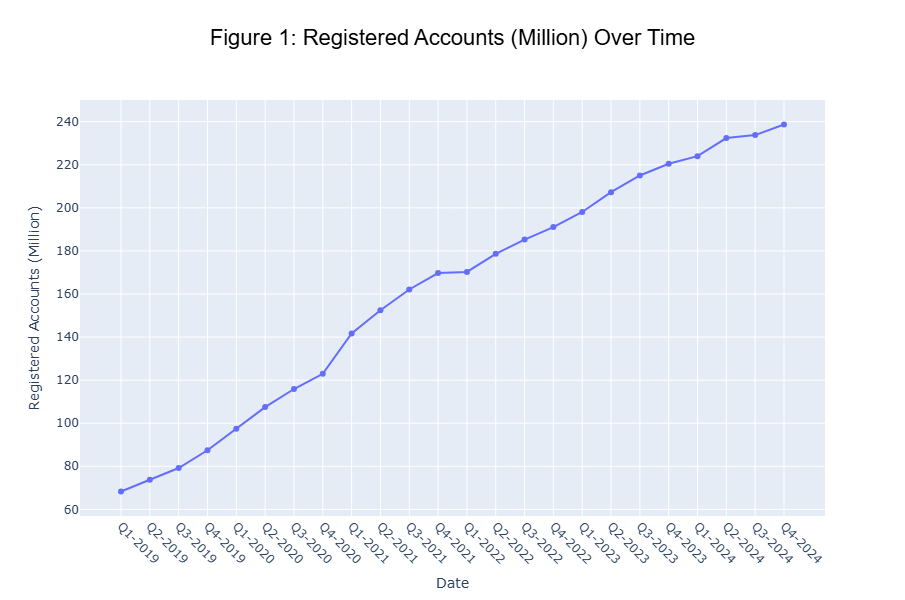

In [154]:
import plotly.express as px

# Create figure
fig = px.line(
    mobile_money,
    x='Date',
    y='Registered_Account',
    markers=True,
    title='Figure 1: Registered Accounts (Million) Over Time',
    labels={'Registered_Account': 'Registered Accounts (Million)'}
)

# Style layout
fig.update_layout(
    width=1000,
    height=600,
    title={
        'text': 'Figure 1: Registered Accounts (Million) Over Time',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=22, family='Arial', color='black')
    },
    xaxis_tickangle=45
)

# Tooltip
fig.update_traces(mode="lines+markers", hovertemplate='Date: %{x}<br>Registered: %{y:.2f}M')

# Save figure
fig.write_image("figure_1_rigistered_accounts.png")

fig.show()

**Interactive Trends of Active Agents (in Millions) Over Time with Hover Insights**

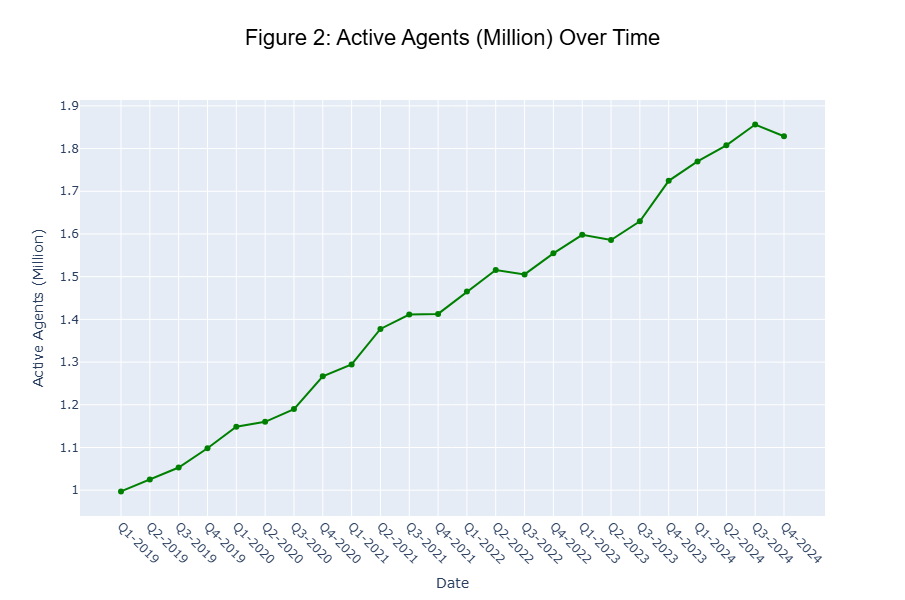

In [157]:
import plotly.express as px

# Create line plot for Active Agents
fig = px.line(
    mobile_money,
    x='Date',
    y='Active_Agents',
    markers=True,
    title='Figure 2: Active Agents (Million) Over Time',
    labels={'Active_Agents': 'Active Agents (Million)'}
)

# Style: green line and markers
fig.update_traces(
    mode="lines+markers",
    line=dict(color='green'),
    marker=dict(color='green'),
    hovertemplate='Date: %{x}<br>Agents: %{y:.2f}M'
)

# Layout: title, size, and axis formatting
fig.update_layout(
    width=1000,
    height=600,
    title={
        'text': 'Figure 2: Active Agents (Million) Over Time',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=22, family='Arial', color='black')
    },
    xaxis_tickangle=45
)

# Export as PNG and SVG
fig.write_image("figure_2_active_agents.png")

fig.show()

**Interactive Time Series of Registered Accounts vs. Active Agents (in Millions) with Hover-Based Insights**

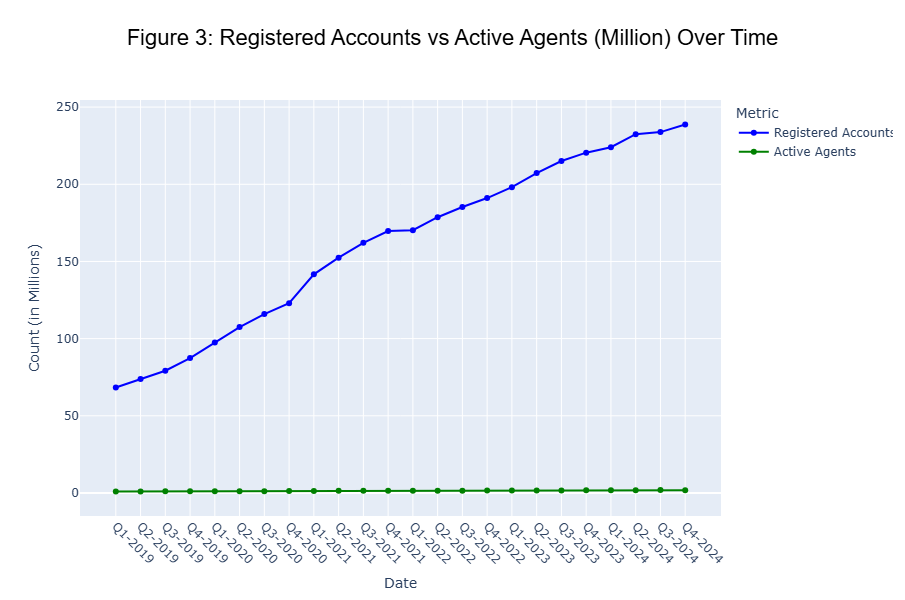

In [160]:
import plotly.graph_objects as go

# Create an empty figure
fig = go.Figure()

# Line 1: Registered Accounts
fig.add_trace(go.Scatter(
    x=mobile_money['Date'],
    y=mobile_money['Registered_Account'],
    mode='lines+markers',
    name='Registered Accounts',
    line=dict(color='blue'),
    marker=dict(color='blue'),
    hovertemplate='Date: %{x}<br>Registered: %{y:.2f}M'
))

# Line 2: Active Agents
fig.add_trace(go.Scatter(
    x=mobile_money['Date'],
    y=mobile_money['Active_Agents'],
    mode='lines+markers',
    name='Active Agents',
    line=dict(color='green'),
    marker=dict(color='green'),
    hovertemplate='Date: %{x}<br>Agents: %{y:.2f}M'
))

# Layout customization
fig.update_layout(
    width=1000,
    height=600,
    title={
        'text': 'Figure 3: Registered Accounts vs Active Agents (Million) Over Time',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=22, family='Arial', color='black')
    },
    xaxis_title='Date',
    yaxis_title='Count (in Millions)',
    xaxis_tickangle=45,
    legend_title='Metric',
    hovermode='x unified'
)

# Save as image files
fig.write_image("figure_3_registered_vs_agents.png")

# Display interactive plot
fig.show()


**Selecting Date from drop-down menu to display Active Agents and Registered Accounts**

In [163]:
from dash import Dash, dcc, html, Output, Input

# Initialize Dash app
app = Dash(__name__)

# App layout
app.layout = html.Div([
    html.H3("Select Date to View Registered Accounts and Active Agents"),
    dcc.Dropdown(
        id='date-dropdown',
        options=[{'label': d, 'value': d} for d in mobile_money['Date']],
        placeholder="Select a Date"
    ),
    html.Div(id='registered-output', style={'marginTop': '20px', 'fontSize': '20px'})
])

@app.callback(
    Output('registered-output', 'children'),
    Input('date-dropdown', 'value')
)
def update_output(selected_date):
    if selected_date:
        row = mobile_money.loc[mobile_money['Date'] == selected_date].iloc[0]
        registered = int(row['Registered_Account'])
        agents = int(row['Active_Agents'])

        output_str = (
            f"📅 Date: {selected_date} — "
            f"Registered Accounts (Million): {registered:,} — "
            f"Active Agents (Million): {agents:,}"
        )

        # Save to text file
        with open("5. selected_date_output.txt", "a", encoding="utf-8") as f:
            f.write(output_str + "\n")

        return output_str

    return "Please select a date."

# Run the app
if __name__ == '__main__':
    app.run(debug=False, port=8051)

**Interactive Trends of Value of Transactions (in Billions) Over Time with Hover Insights**

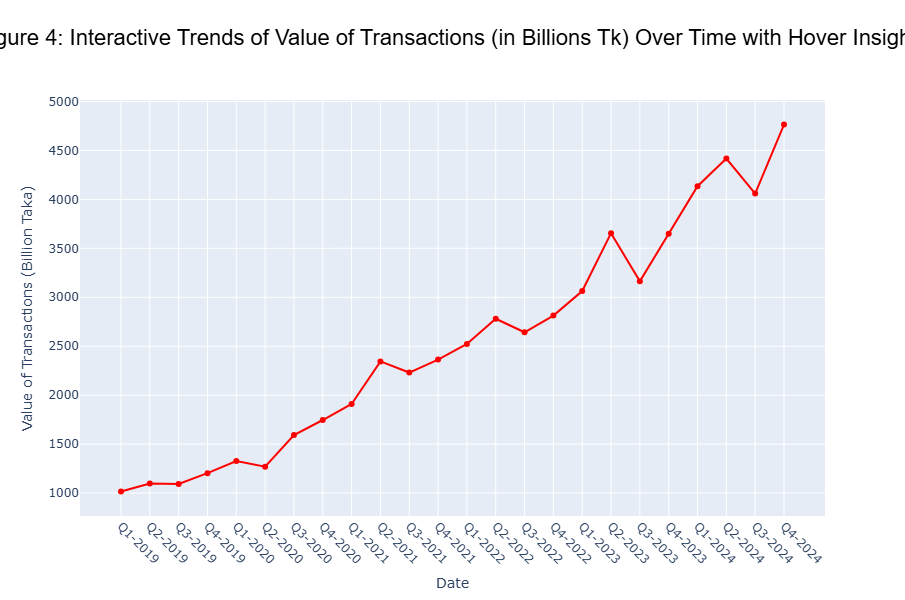

In [170]:
# Convert Value_of_Trans from Million to Billion
mobile_money['Value_of_Trans_Billion'] = mobile_money['Value_of_Trans'] / 1000

# Create interactive plot
fig = px.line(
    mobile_money,
    x='Date',
    y='Value_of_Trans_Billion',
    markers=True,
    title='Figure 4: Value of Transactions (Billion Taka) Over Time',
    labels={'Value_of_Trans_Billion': 'Value of Transactions (Billion Taka)'}
)

# Add hover and style
fig.update_traces(
    mode="lines+markers",
    line=dict(color='red'),
    marker=dict(color='red'),
    hovertemplate='Date: %{x|%b %Y}<br>Value: %{y:.2f}B'
)

# Customize layout
fig.update_layout(
    width=1000,
    height=600,
    title={
        'text': 'Figure 4: Interactive Trends of Value of Transactions (in Billions Tk) Over Time with Hover Insights',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=22, family='Arial', color='black')
    },
    xaxis_tickangle=45
)

# Save image (requires `kaleido`)
fig.write_image("figure_4_value_of_transactions_billion.png")

# Show plot
fig.show()


**Time Series of Mobile money contribution to GDP**

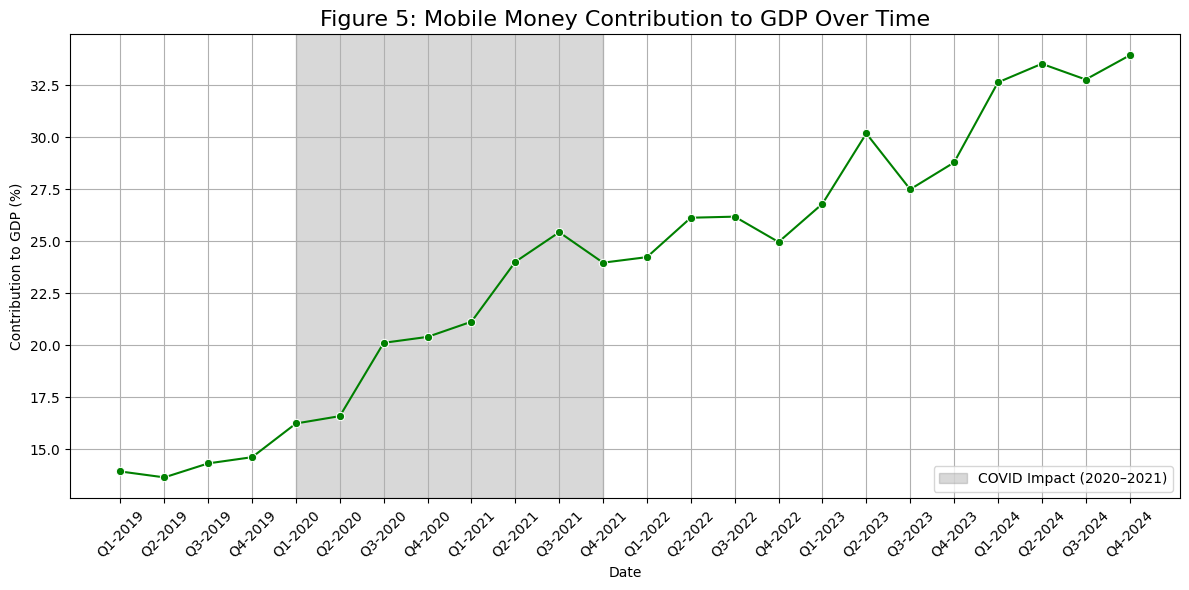

In [175]:
# Set up the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Line plot
sns.lineplot(
    data=mobile_money,
    x='Date',
    y='Mobile_Money_Contribution_GDP(%)',
    marker='o',
    color='green',
    ax=ax
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Title and labels
plt.title('Figure 5: Mobile Money Contribution to GDP Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Contribution to GDP (%)')

# Highlight COVID Impact period (adjust span by index or datetime as needed)
# Assuming Date is sorted and quarterly; adjust if using datetime
start_idx = mobile_money[mobile_money['Date'].str.contains("2020")].index[0]
end_idx = mobile_money[mobile_money['Date'].str.contains("2021")].index[-1]
plt.axvspan(start_idx, end_idx, color='gray', alpha=0.3, label='COVID Impact (2020–2021)')

# Add legend and grid
plt.legend()
plt.grid(True)

# Export as PNG and SVG
plt.tight_layout()
fig.savefig("figure_5_contribution_to_GDP.png", format='png', dpi=300)

# Show plot
plt.show()


**Area graph of Registered Accounts vs Mobile Subscribers with Hover-Based Insights**

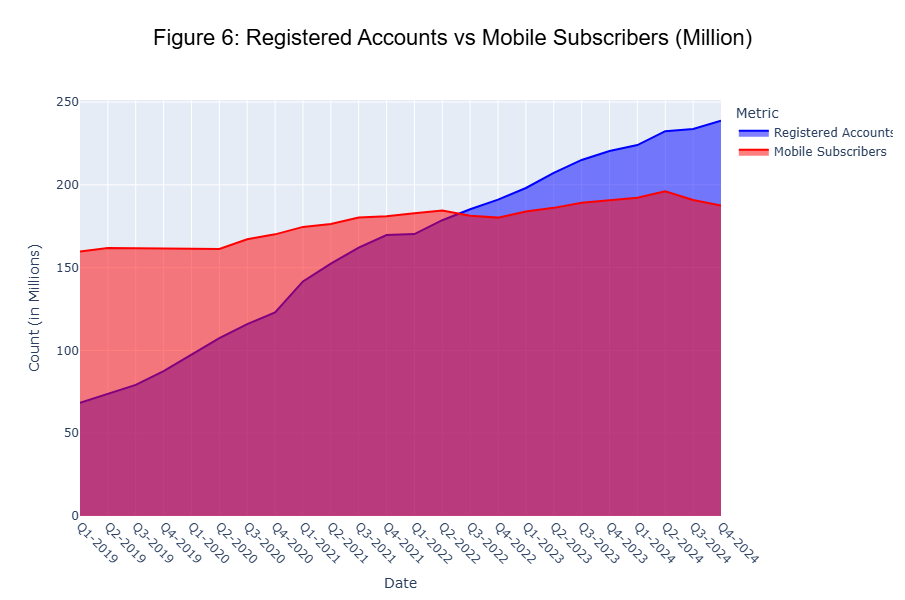

In [31]:
# Create an empty figure
fig = go.Figure()

# Area 1: Registered Accounts
fig.add_trace(go.Scatter(
    x=mobile_money['Date'],
    y=mobile_money['Registered_Account'],
    mode='lines',
    name='Registered Accounts',
    line=dict(color='blue'),
    fill='tozeroy',  # Area fill
    hovertemplate='Date: %{x}<br>Registered: %{y:.2f}M'
))

# Area 2: Mobile Subscribers
fig.add_trace(go.Scatter(
    x=mobile_money['Date'],
    y=mobile_money['Mobile_Subscriber'],
    mode='lines',
    name='Mobile Subscribers',
    line=dict(color='red'),
    fill='tozeroy',
    hovertemplate='Date: %{x}<br>Subscribers: %{y:.2f}M'
))

# Layout customization
fig.update_layout(
    width=1000,
    height=600,
    title={
        'text': 'Figure 6: Registered Accounts vs Mobile Subscribers (Million)',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=22, family='Arial', color='black')
    },
    xaxis_title='Date',
    yaxis_title='Count (in Millions)',
    xaxis_tickangle=45,
    legend_title='Metric',
    hovermode='x unified'
)

# Export as PNG and SVG
fig.write_image("figure_6_area_registered_vs_subscribers.png")

# Show interactive plot
fig.show()


## Section 2: Agent Network Expansion

**Active Agents' growth rate**

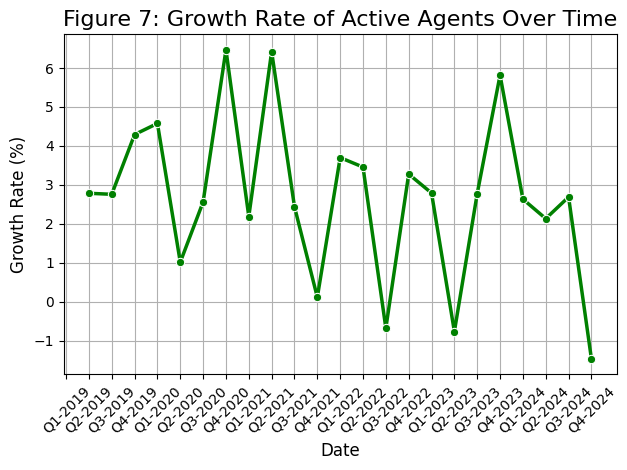

In [34]:
# Plot the growth rate line
sns.lineplot(
    data=mobile_money,
    x='Date',
    y='Active_Agents_Growth(%)',
    marker='o',
    color='green',
    linewidth=2.5
)

# Titles and labels
plt.title('Figure 7: Growth Rate of Active Agents Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Growth Rate (%)', fontsize=12)

# X-axis rotation and spacing
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("figure_7_active_agents_growth.png", format='png', dpi=300)

# Display the plot
plt.show()


**Stcked Bar Chart for Third Party Transactions**

<Figure size 1400x600 with 0 Axes>

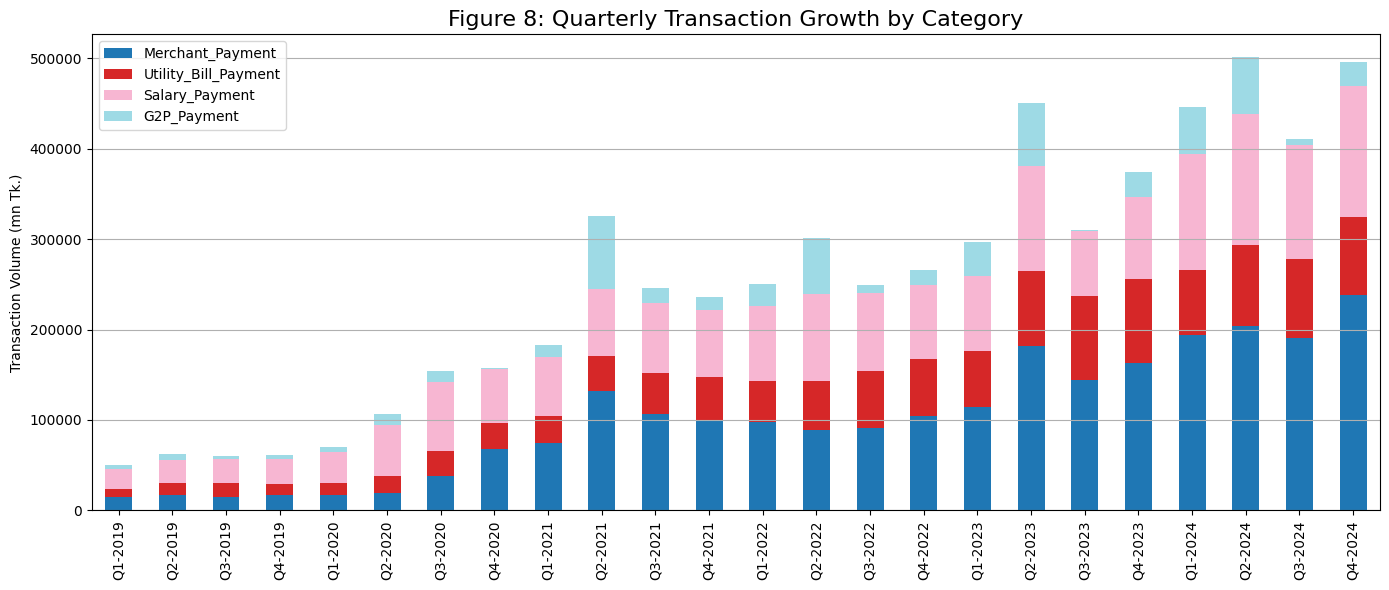

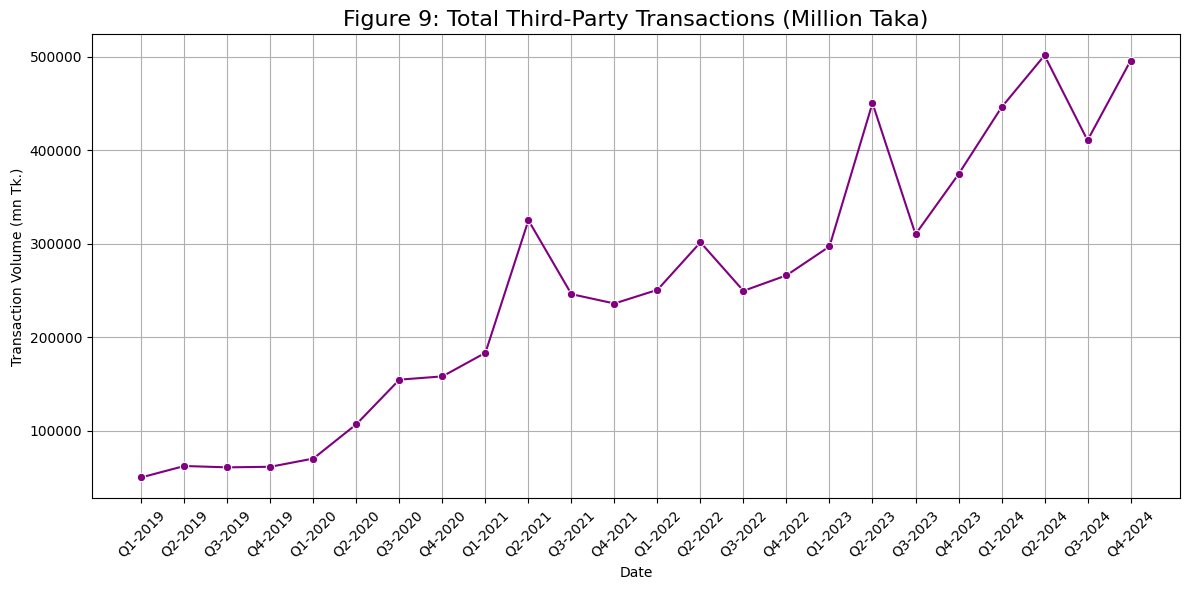

In [181]:
# Sum across selected columns to get Third_Party_Total
third_party_cols = ['Merchant_Payment', 'Utility_Bill_Payment', 'Salary_Payment', 'G2P_Payment']
mobile_money['Third_Party_Total'] = mobile_money[third_party_cols].sum(axis=1)

# --- Figure 8: Stacked Bar Plot ---
plt.figure(figsize=(14, 6))
mobile_money[third_party_cols].plot(kind='bar', stacked=True, figsize=(14, 6), colormap='tab20')
plt.xticks(ticks=np.arange(len(mobile_money)), labels=mobile_money['Date'], rotation=90)
plt.title('Figure 8: Quarterly Transaction Growth by Category', fontsize=16)
plt.ylabel('Transaction Volume (mn Tk.)')
plt.tight_layout()
plt.grid(True, axis='y')
plt.savefig("figure_8_third_party_categories.png", format='png', dpi=300)
plt.savefig("figure_8_third_party_categories.svg", format='svg')
plt.show()

# --- Figure 9: Line Plot of Total Third-Party Transactions ---
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Third_Party_Total', data=mobile_money, marker='o', color='purple')
plt.title('Figure 9: Total Third-Party Transactions (Million Taka)', fontsize=16)
plt.ylabel('Transaction Volume (mn Tk.)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig("figure_9_total_third_party.png", format='png', dpi=300)
plt.show()


# Section 4: Cashless Transactions

<Figure size 1400x600 with 0 Axes>

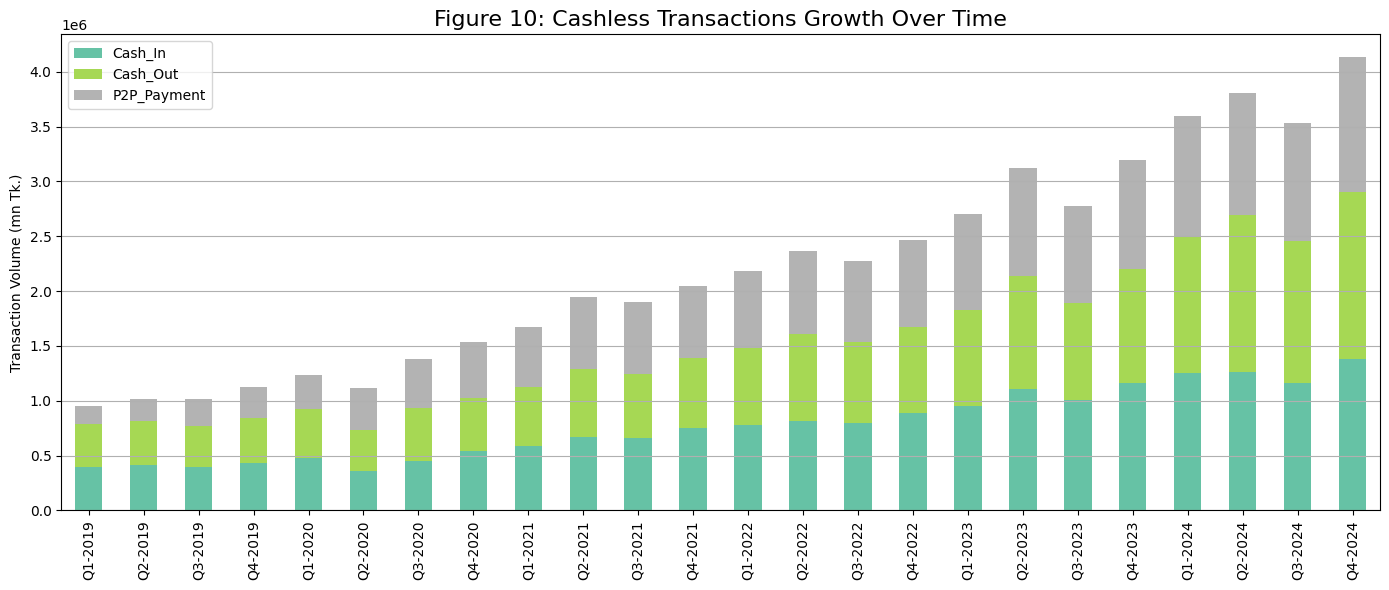

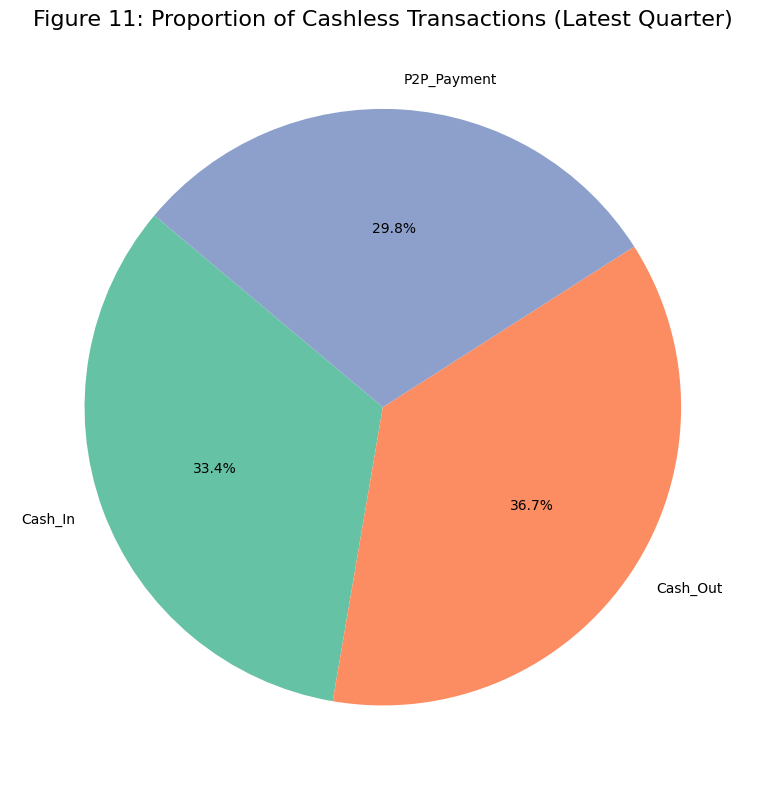

In [40]:
# Define cashless transaction columns
cashless_cols = ['Cash_In', 'Cash_Out', 'P2P_Payment']

# --- Figure 10: Cashless Transactions Growth (Stacked Bar) ---
plt.figure(figsize=(14, 6))
mobile_money[cashless_cols].plot(kind='bar', stacked=True, figsize=(14, 6), colormap='Set2')
plt.xticks(ticks=np.arange(len(mobile_money)), labels=mobile_money['Date'], rotation=90)
plt.title('Figure 10: Cashless Transactions Growth Over Time', fontsize=16)
plt.ylabel('Transaction Volume (mn Tk.)')
plt.tight_layout()
plt.grid(True, axis='y')
plt.savefig("figure_10_cashless_growth.png", format='png', dpi=300)
plt.show()

# --- Figure 11: Pie Chart of Cashless Transactions (Latest Quarter) ---
latest = mobile_money.iloc[-1]

plt.figure(figsize=(8, 8))
plt.pie(
    latest[cashless_cols],
    labels=cashless_cols,
    autopct='%1.1f%%',
    startangle=140,
    colors=['#66c2a5', '#fc8d62', '#8da0cb']
)
plt.title('Figure 11: Proportion of Cashless Transactions (Latest Quarter)', fontsize=16)
plt.tight_layout()
plt.savefig("figure_11_cashless_proportion_latest.png", format='png', dpi=300)
plt.show()


# Section 5: Interoperability

<Figure size 1400x600 with 0 Axes>

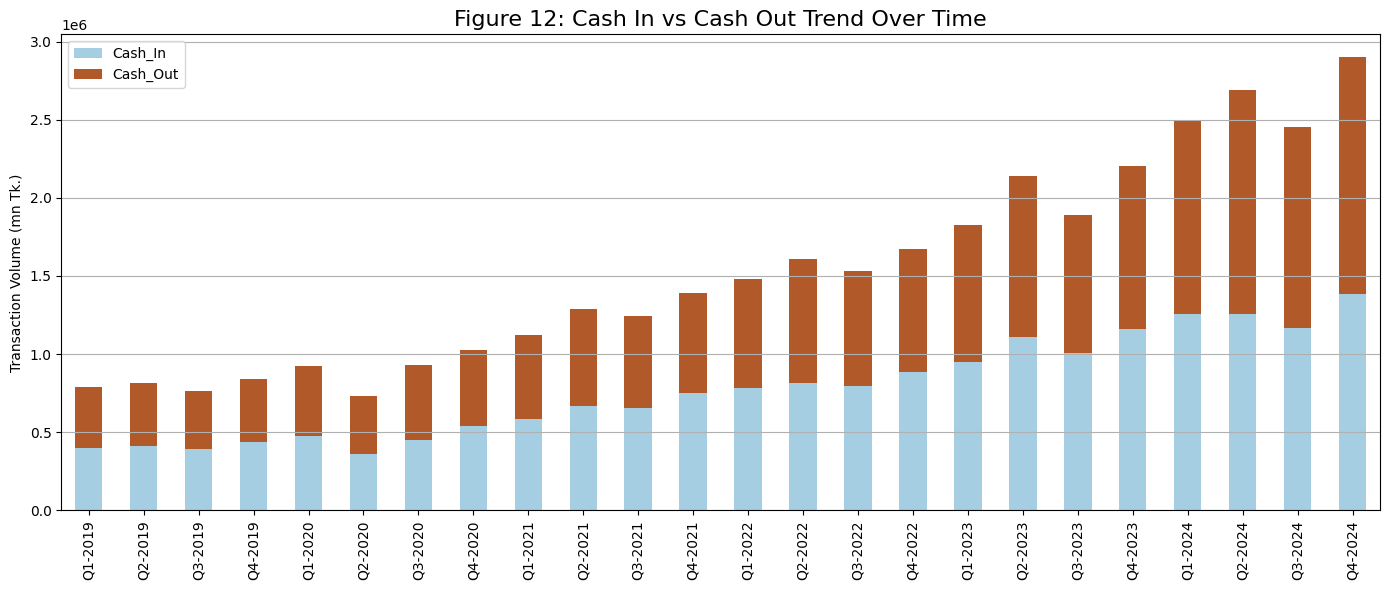

In [43]:
#Cash In vs Cash Out Trend (Stacked Bar Chart) ---
plt.figure(figsize=(14, 6))
mobile_money[['Cash_In', 'Cash_Out']].plot(kind='bar', stacked=True, figsize=(14, 6), colormap='Paired')

plt.xticks(
    ticks=np.arange(len(mobile_money)),
    labels=mobile_money['Date'],
    rotation=90
)
plt.title('Figure 12: Cash In vs Cash Out Trend Over Time', fontsize=16)
plt.ylabel('Transaction Volume (mn Tk.)')
plt.tight_layout()
plt.grid(True, axis='y')

# Save the figure
plt.savefig("figure_12_cash_in_vs_out.png", format='png', dpi=300)

# Show plot
plt.show()


# Section 6: Financial Services

<Figure size 1400x600 with 0 Axes>

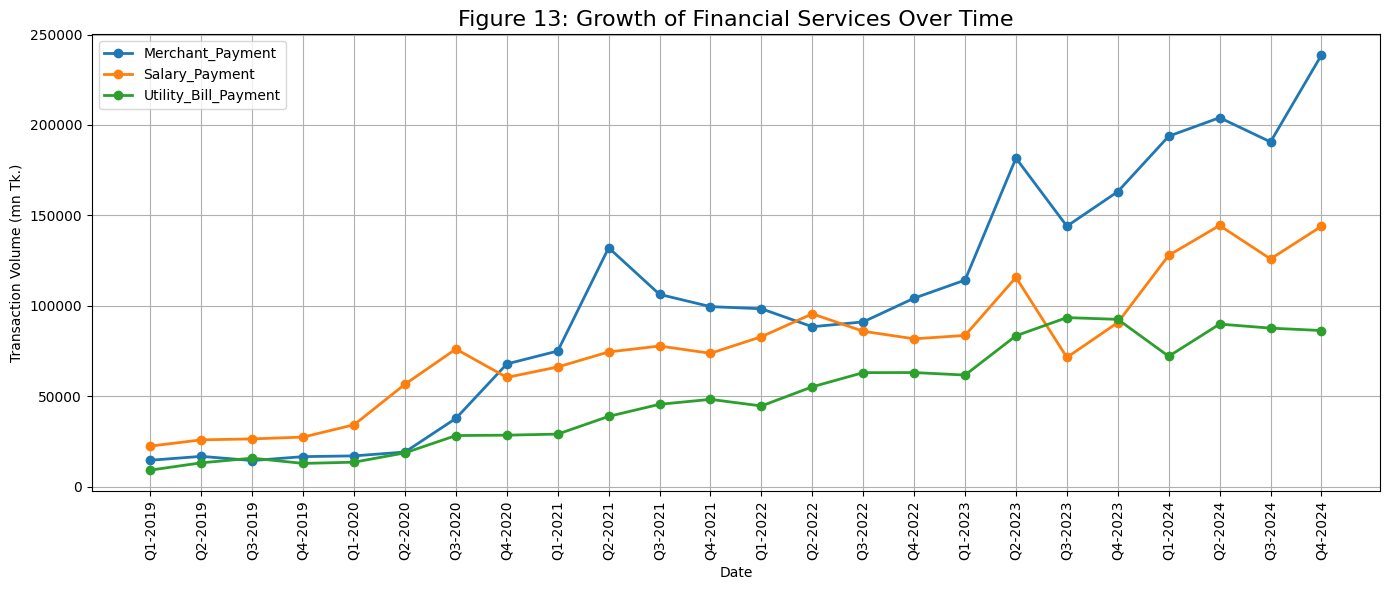

In [46]:
# Define financial service columns
financial_cols = ['Merchant_Payment', 'Salary_Payment', 'Utility_Bill_Payment']

# --- Figure 13: Growth of Financial Services ---
plt.figure(figsize=(14, 6))
mobile_money[financial_cols].plot(figsize=(14, 6), linewidth=2, marker='o')

plt.xticks(
    ticks=np.arange(len(mobile_money)),
    labels=mobile_money['Date'],
    rotation=90
)
plt.title('Figure 13: Growth of Financial Services Over Time', fontsize=16)
plt.ylabel('Transaction Volume (mn Tk.)')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("figure_13_financial_services_growth.png", format='png', dpi=300)

# Show the plot
plt.show()


# Section 7: Gender Gap Analysis 

In [49]:
# Import train dataset
df = pd.read_csv('C:/Users/ASUS/Ashish/Data/MFS/district_agent_account_gender_gap.csv')
df.head()

,District,Male_Owned_Agent_Total,Female_Owned_Agent_Total,Other_Agent_Total,Total_Agents,Male_Account_Total,Female_Account_Total,Other_AccountTotal,Total_Account,Gender_Gap,Population_2022,Protion_Total_Acc_Population_2022
0,Cumilla,18966,551,1,19518,1931926,1976631,1505,3910062,-2.31,6212216,0.63
1,Feni,7049,98,0,7147,619127,551892,573,1171592,10.86,1648896,0.71
2,B_baria,9879,642,7,10528,940871,942657,777,1884305,-0.19,3306559,0.57
3,Rangamati,1715,67,0,1782,237876,223410,167,461453,6.08,647587,0.71
4,Noakhali,10862,262,1,11125,1257928,1118196,1524,2377648,11.11,3625252,0.66


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   District                           64 non-null     object 
 1   Male_Owned_Agent_Total             64 non-null     int64  
 2   Female_Owned_Agent_Total           64 non-null     int64  
 3   Other_Agent_Total                  64 non-null     int64  
 4   Total_Agents                       64 non-null     int64  
 5   Male_Account_Total                 64 non-null     int64  
 6   Female_Account_Total               64 non-null     int64  
 7   Other_AccountTotal                 64 non-null     int64  
 8   Total_Account                      64 non-null     int64  
 9   Gender_Gap                         64 non-null     float64
 10  Population_2022                    64 non-null     int64  
 11  Protion_Total_Acc_Population_2022  64 non-null     float64
d

In [53]:
# Replace the district names
district_name_corrections = {
    "B_baria": "Brahamanbaria",
    "Barishal": "Barisal",
    "Bogura": "Bogra",
    "Chattogram": "Chittagong",
    "Chapai_N_ganj": "Nawabganj",
    "Cumilla": "Comilla",
    "Jhalakathi": "Jhalokati",
    "Jashore": "Jessore",
    "Khagrachhari": "Khagrachhori",
    "Moulvibazar": "Maulvibazar",
    "Netrokona": "Netrakona",
}

# Strip whitespace and convert district names to lowercase for consistent comparison
df['District'] = df['District'].str.strip()

# Ensure case insensitivity by normalizing the dataset and dictionary keys to lowercase
district_name_corrections = {k.lower(): v for k, v in district_name_corrections.items()}

# Apply the replacements
df['District'] = df['District'].str.lower().replace(district_name_corrections)

# Capitalize the first letter of each word for uniformity (optional)
df['District'] = df['District'].str.title()

# Save the updated dataset
df.to_csv('C:/Users/ASUS/Ashish/Data/MFS/district_agent_account_gender_gap_updated.csv', index=False)

# Verify the changes
print(df['District'].unique())

['Comilla' 'Feni' 'Brahamanbaria' 'Rangamati' 'Noakhali' 'Chandpur'
 'Lakshmipur' 'Chittagong' 'Coxsbazar' 'Khagrachhori' 'Bandarban'
 'Sirajganj' 'Pabna' 'Bogra' 'Rajshahi' 'Natore' 'Joypurhat' 'Nawabganj'
 'Naogaon' 'Jessore' 'Satkhira' 'Meherpur' 'Narail' 'Chuadanga' 'Kushtia'
 'Magura' 'Khulna' 'Bagerhat' 'Jhenaidah' 'Jhalokati' 'Patuakhali'
 'Pirojpur' 'Barisal' 'Bhola' 'Barguna' 'Sylhet' 'Maulvibazar' 'Habiganj'
 'Sunamganj' 'Narsingdi' 'Gazipur' 'Shariatpur' 'Narayanganj' 'Tangail'
 'Kishoreganj' 'Manikganj' 'Dhaka' 'Munshiganj' 'Rajbari' 'Madaripur'
 'Gopalganj' 'Faridpur' 'Panchagarh' 'Dinajpur' 'Lalmonirhat' 'Nilphamari'
 'Gaibandha' 'Thakurgaon' 'Rangpur' 'Kurigram' 'Sherpur' 'Mymensingh'
 'Jamalpur' 'Netrakona']


In [55]:
print(df['District'].count())

64


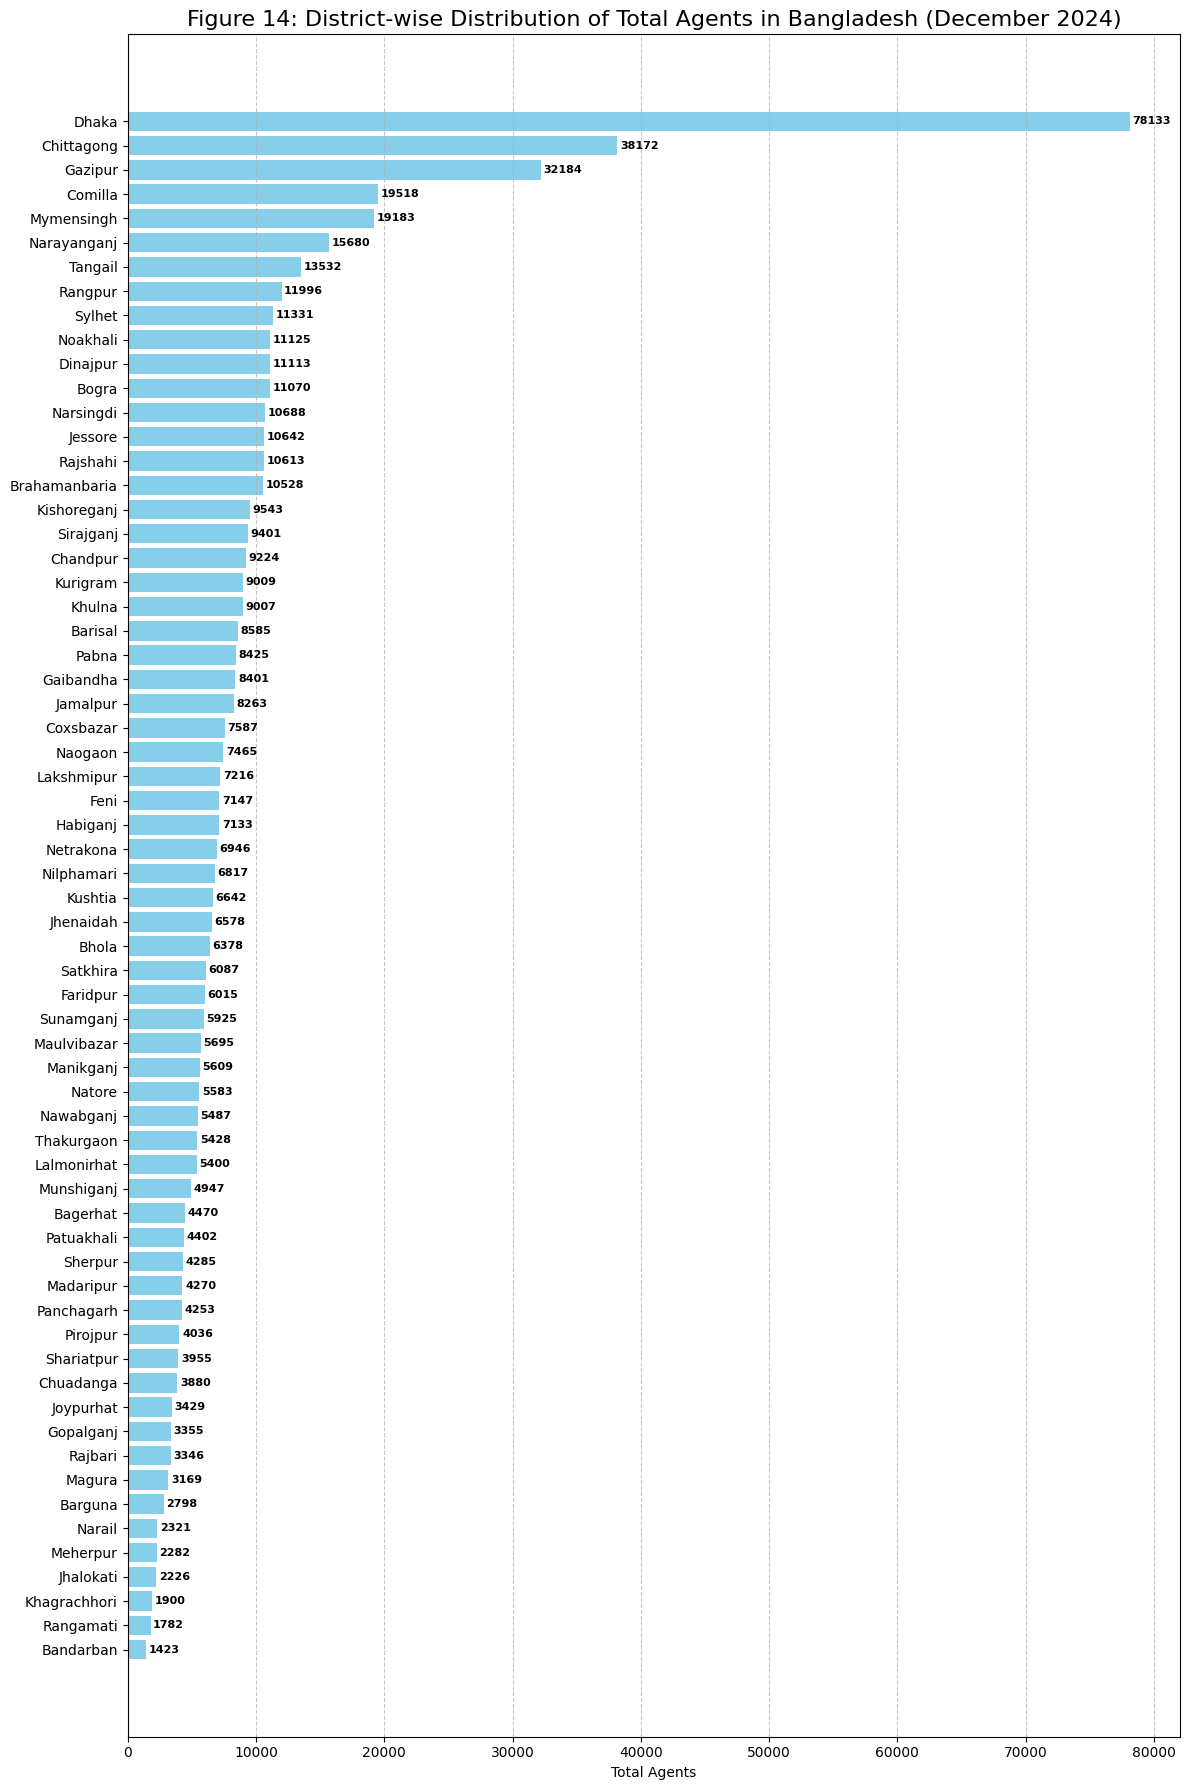

In [57]:
import os

# Load the updated dataset
df_updated = pd.read_csv('district_agent_account_gender_gap_updated.csv')

# Sort data by Total Agents (ascending)
df_sorted = df_updated.sort_values(by='Total_Agents', ascending=True)

# Create horizontal bar plot
plt.figure(figsize=(12, 18))
plt.barh(df_sorted['District'], df_sorted['Total_Agents'], color='skyblue', label='Total Agents')

# Add value annotations
for index, (district, value) in enumerate(zip(df_sorted['District'], df_sorted['Total_Agents'])):
    plt.text(value + 200, index, str(value), va='center', fontsize=8, fontweight='bold', color='black')

# Format plot
plt.xlabel('Total Agents')
plt.title('Figure 14: District-wise Distribution of Total Agents in Bangladesh (December 2024)', fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save path
output_dir = "C:/Users/ASUS/Ashish/Data/MFS/"
os.makedirs(output_dir, exist_ok=True)

# Save as both JPG and SVG
plt.savefig(os.path.join(output_dir, "figure_14_agents_distribution_bangladesh_districts.jpg"), dpi=300)

# Show plot
plt.show()


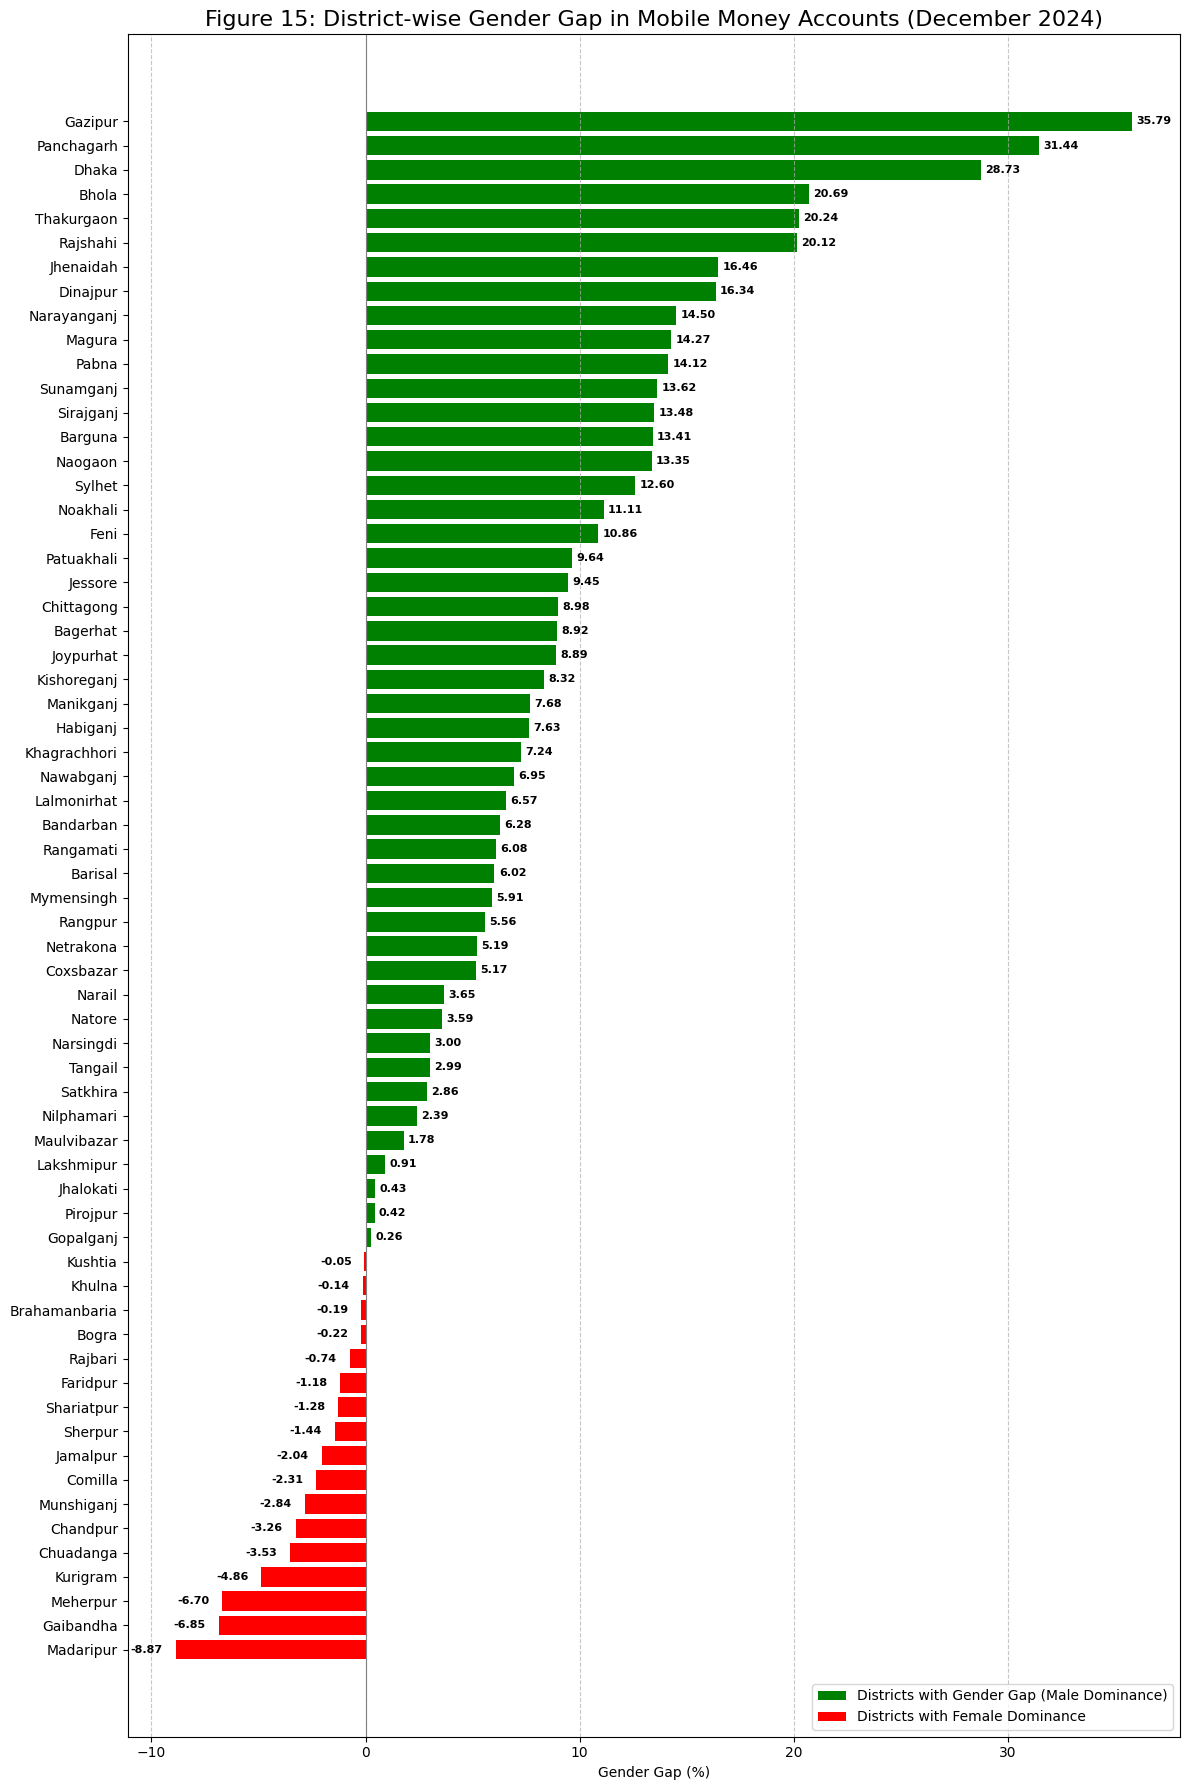

In [59]:
from matplotlib.patches import Patch

# Sort by Gender_Gap for better visual order
df_sorted = df_updated.sort_values(by='Gender_Gap', ascending=True)

# Color bars: red for negative gap, green for positive
colors = ['red' if gap < 0 else 'green' for gap in df_sorted['Gender_Gap']]

# Plot
plt.figure(figsize=(12, 18))
bars = plt.barh(df_sorted['District'], df_sorted['Gender_Gap'], color=colors)

# Add labels for each bar
for index, (district, gap) in enumerate(zip(df_sorted['District'], df_sorted['Gender_Gap'])):
    plt.text(gap + (0.2 if gap >= 0 else -0.6), index, f'{gap:.2f}',
             va='center', ha='left' if gap >= 0 else 'right',
             fontsize=8, fontweight='bold', color='black')

# Add custom legend
legend_elements = [
    Patch(facecolor='green', label='Districts with Gender Gap (Male Dominance)'),
    Patch(facecolor='red', label='Districts with Female Dominance')
]
plt.legend(handles=legend_elements, loc='lower right', frameon=True)

# Formatting
plt.xlabel('Gender Gap (%)')
plt.title('Figure 15: District-wise Gender Gap in Mobile Money Accounts (December 2024)', fontsize=16)
plt.axvline(0, color='gray', linewidth=0.8)  # vertical reference line at 0
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save path
output_dir = "C:/Users/ASUS/Ashish/Data/MFS/"
os.makedirs(output_dir, exist_ok=True)

# Save as both JPG and SVG
plt.savefig(os.path.join(output_dir, "figure_15_gender_gap_distribution_bangladesh_districts.jpg"), dpi=300)

# Show the plot
plt.show()


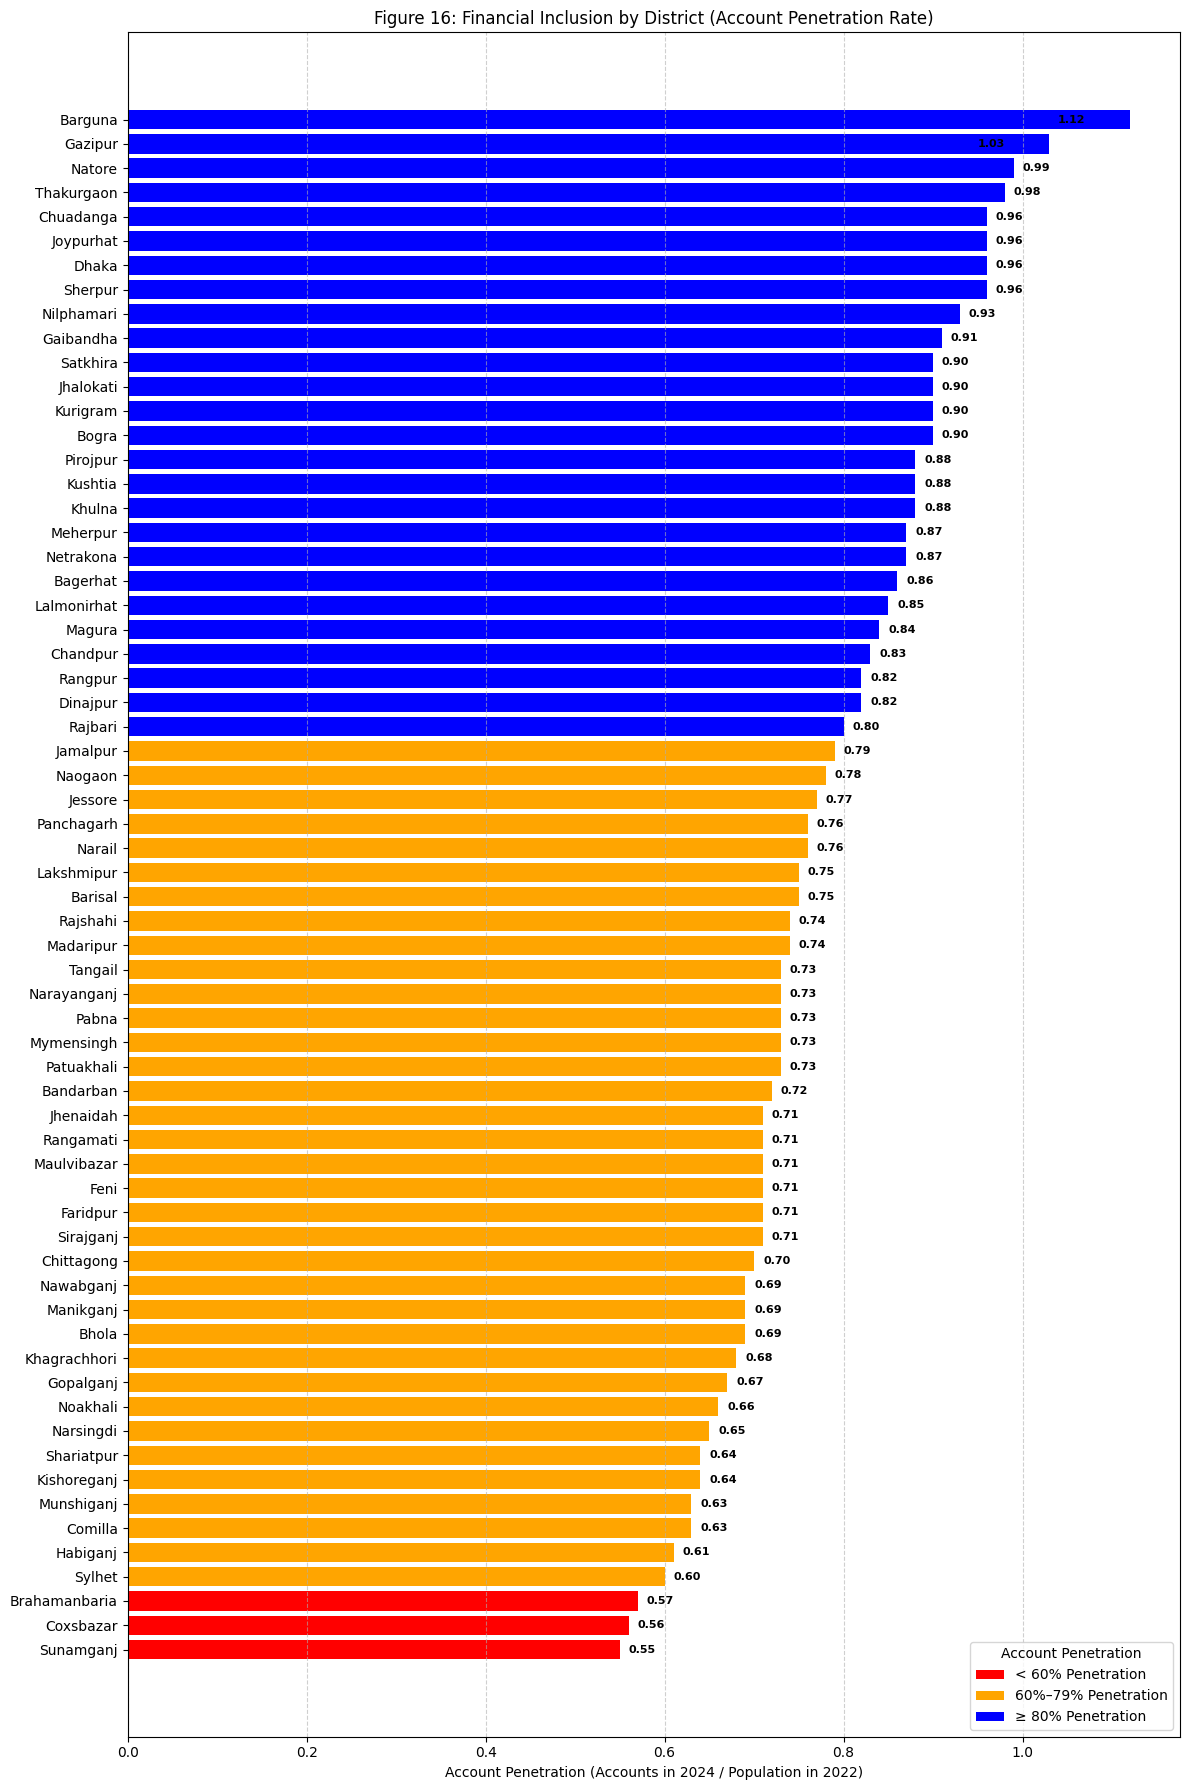

In [61]:
df_updated['Proportion_Total_Acc_Population_2022'] = (
    df_updated['Total_Account'] / df_updated['Population_2022']
) * 100


# Sort by Proportion for better visual order
df_sorted = df_updated.sort_values(by='Proportion_Total_Acc_Population_2022', ascending=True)

# Define colors based on penetration thresholds
colors = ['blue' if val >= 0.8 else 'orange' if val >= 0.6 else 'red'
          for val in df_sorted['Protion_Total_Acc_Population_2022']]

# Create the bar plot
plt.figure(figsize=(12, 18))
bars = plt.barh(
    df_sorted['District'],
    df_sorted['Protion_Total_Acc_Population_2022'],
    color=colors
)

# Annotate each bar with the value
for index, (district, val) in enumerate(zip(df_sorted['District'], df_sorted['Protion_Total_Acc_Population_2022'])):
    plt.text(
        val + 0.01 if val < 1 else val - 0.05,
        index,
        f'{val:.2f}',
        va='center',
        ha='left' if val < 1 else 'right',
        fontsize=8,
        fontweight='bold',
        color='black'
    )

# Add legend
legend_elements = [
    Patch(facecolor='red', label='< 60% Penetration'),
    Patch(facecolor='orange', label='60%–79% Penetration'),
    Patch(facecolor='blue', label='≥ 80% Penetration')
]

# Formatting
plt.legend(handles=legend_elements, title='Account Penetration', loc='lower right', frameon=True)
plt.xlabel('Account Penetration (Accounts in 2024 / Population in 2022)')
plt.title('Figure 16: Financial Inclusion by District (Account Penetration Rate)')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

# Save path
output_dir = "C:/Users/ASUS/Ashish/Data/MFS/"
os.makedirs(output_dir, exist_ok=True)

# Save plot
plt.savefig(os.path.join(output_dir, "figure_16_proportion_acc_population_2022.jpg"), dpi=300)

# Show plot
plt.show()


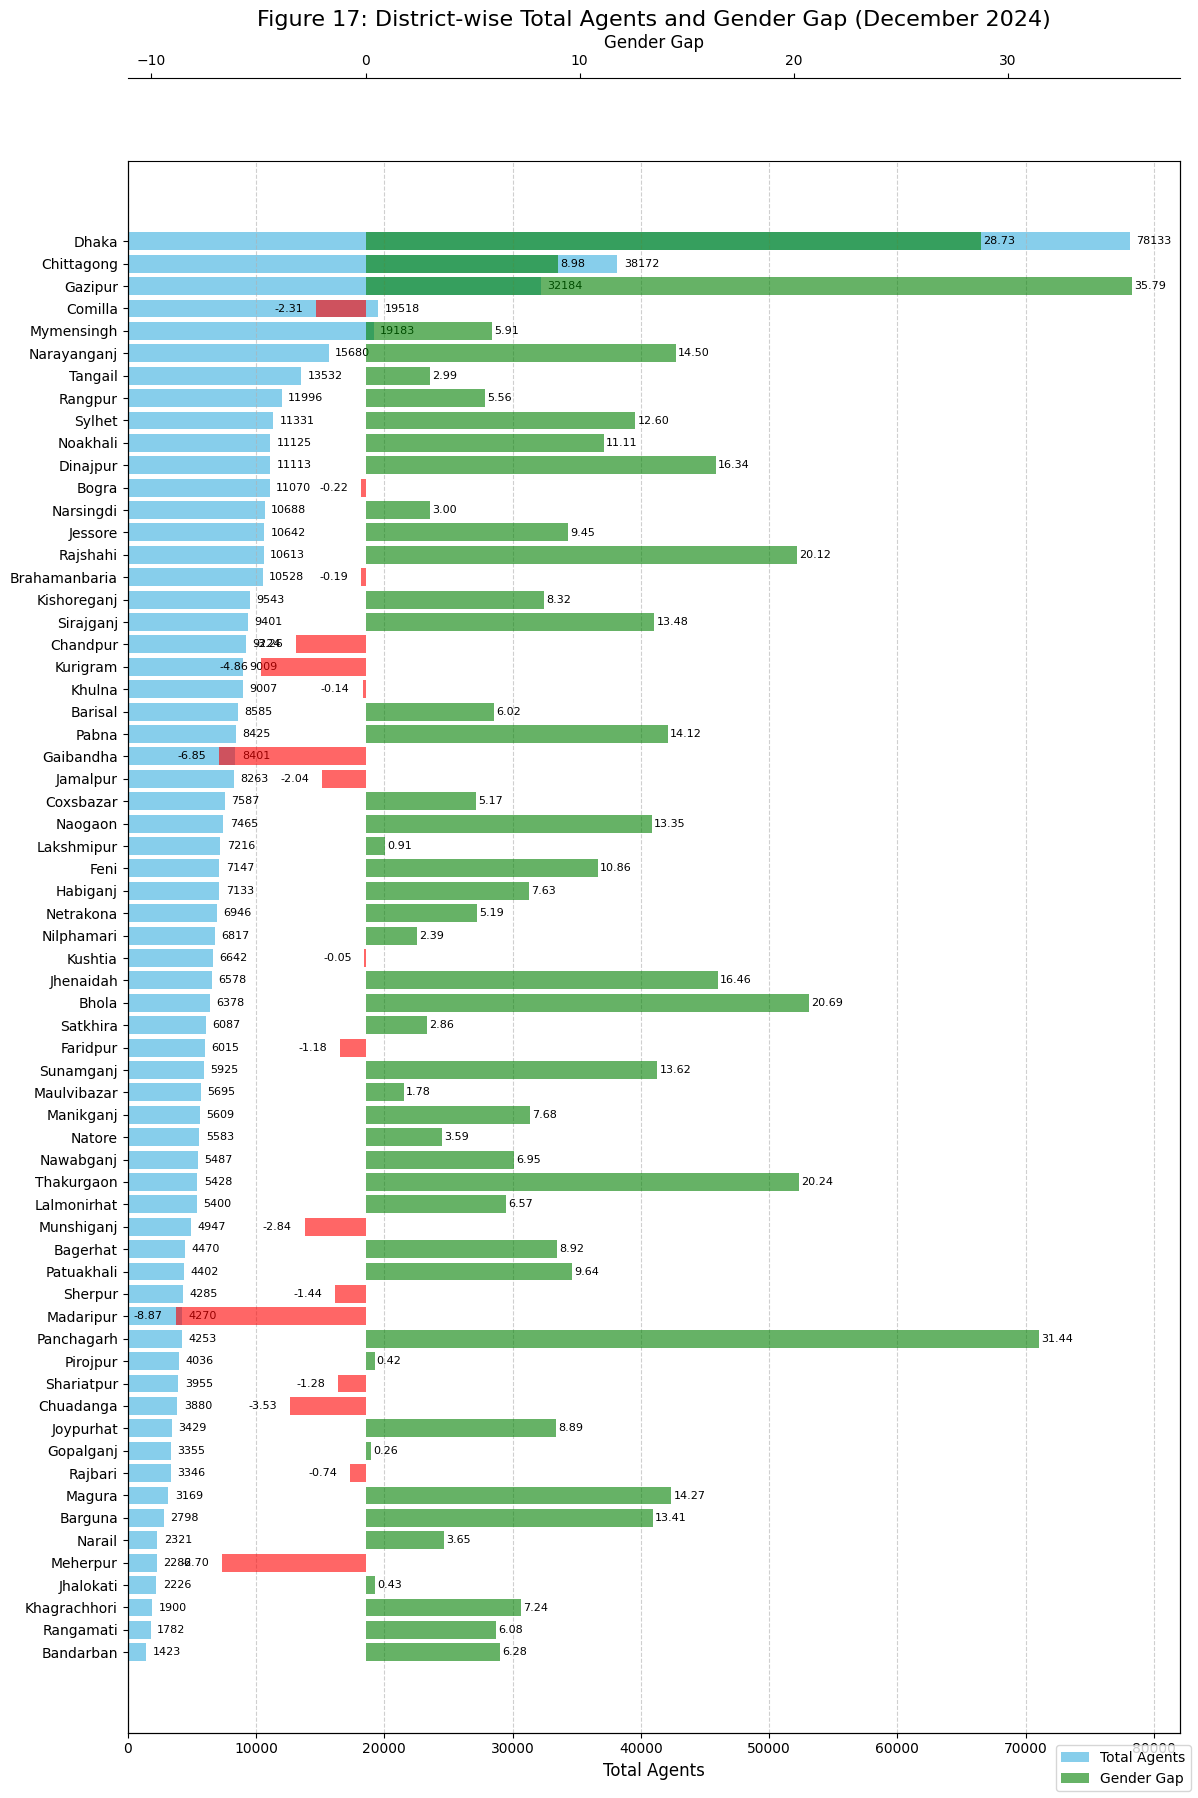

In [65]:
# Sort data for better visual structure
df_sorted = df_updated.sort_values(by='Total_Agents', ascending=True)

# Define color for Gender Gap (positive = green, negative = red)
colors = ['red' if gap < 0 else 'green' for gap in df_sorted['Gender_Gap']]

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(12, 18))

# Plot Total Agents on primary axis
bars1 = ax1.barh(df_sorted['District'], df_sorted['Total_Agents'], color='skyblue', label='Total Agents')
ax1.set_xlabel('Total Agents', fontsize=12)
ax1.set_title('Figure 17: District-wise Total Agents and Gender Gap (December 2024)', fontsize=16)
ax1.grid(axis='x', linestyle='--', alpha=0.6)

# Annotate Total Agents
for bar in bars1:
    width = bar.get_width()
    ax1.text(width + 500, bar.get_y() + bar.get_height()/2,
             f'{int(width)}', va='center', fontsize=8)

# Create secondary axis
ax2 = ax1.twiny()
bars2 = ax2.barh(df_sorted['District'], df_sorted['Gender_Gap'],
                 color=colors, alpha=0.6, label='Gender Gap')

# Configure secondary axis
ax2.set_xlabel('Gender Gap', fontsize=12)
ax2.spines['top'].set_position(('outward', 60))
ax2.grid(False)

# Annotate Gender Gap
for bar, gap in zip(bars2, df_sorted['Gender_Gap']):
    gap_text = f'{gap:.2f}'
    ax2.text(bar.get_width() + (0.1 if gap >= 0 else -0.6),
             bar.get_y() + bar.get_height()/2,
             gap_text,
             va='center',
             ha='left' if gap >= 0 else 'right',
             fontsize=8, color='black')

# Combine legends
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, loc='lower right', fontsize=10)

plt.tight_layout()

# Save path
output_dir = "C:/Users/ASUS/Ashish/Data/MFS/"
os.makedirs(output_dir, exist_ok=True)

# Save as both JPG and SVG
plt.savefig(os.path.join(output_dir, "figure_17_district_agents_gender_gap_distribution_bangladesh_districts.jpg"), dpi=300)

# Show the plot
plt.show()

# Section 8: Root Causes Analysis

In [68]:
import geopandas as gpd

# Load the Bangladesh Upazila GeoJSON
upazila_geojson = gpd.read_file("output.geojson")

# Check the structure of the GeoDataFrame
print(upazila_geojson.head())

                                            geometry
0    POLYGON ((0 0, 0 2838, 1982 2838, 1982 0, 0 0))
1  POLYGON ((1655 2324, 1656 2323, 1657 2324, 165...
2  POLYGON ((1741 2285, 1742 2284, 1751 2284, 175...
3  POLYGON ((1745 2288, 1745 2290, 1750 2290, 175...
4  POLYGON ((1731 2285, 1732 2284, 1734 2284, 173...


In [70]:
file_path = "gadm41_BGD.gpkg"  # Update this with the correct path

if not os.path.exists(file_path):
    print(f"File not found: {file_path}")

In [72]:
import fiona

# List all layers in the GeoPackage
layers = fiona.listlayers(file_path)
print("Available layers:", layers)

Available layers: ['ADM_ADM_0', 'ADM_ADM_1', 'ADM_ADM_2', 'ADM_ADM_3', 'ADM_ADM_4']


In [74]:
layer_name = "ADM_ADM_2"  # District layer
district_geojson = gpd.read_file(file_path, layer=layer_name)

# Display the first few rows
print(district_geojson.head())
print(district_geojson.columns)

       GID_2 GID_0     COUNTRY    GID_1   NAME_1 NL_NAME_1      NAME_2  \
0  BGD.1.1_1   BGD  Bangladesh  BGD.1_1  Barisal        NA     Barguna   
1  BGD.1.2_1   BGD  Bangladesh  BGD.1_1  Barisal        NA     Barisal   
2  BGD.1.3_1   BGD  Bangladesh  BGD.1_1  Barisal        NA       Bhola   
3  BGD.1.4_1   BGD  Bangladesh  BGD.1_1  Barisal        NA   Jhalokati   
4  BGD.1.5_1   BGD  Bangladesh  BGD.1_1  Barisal        NA  Patuakhali   

  VARNAME_2 NL_NAME_2 TYPE_2 ENGTYPE_2  CC_2    HASC_2  \
0        NA        NA   Zila   Distict  1004  BD.BA.PR   
1        NA        NA   Zila   Distict  1006  BD.BA.PR   
2        NA        NA   Zila   Distict  1009  BD.BA.PR   
3        NA        NA   Zila   Distict  1042  BD.BA.PR   
4        NA        NA   Zila   Distict  1078  BD.BA.PR   

                                            geometry  
0  MULTIPOLYGON (((89.98476 21.9577, 89.98483 21....  
1  MULTIPOLYGON (((90.43166 22.49055, 90.43195 22...  
2  MULTIPOLYGON (((90.81534 21.88569, 90.

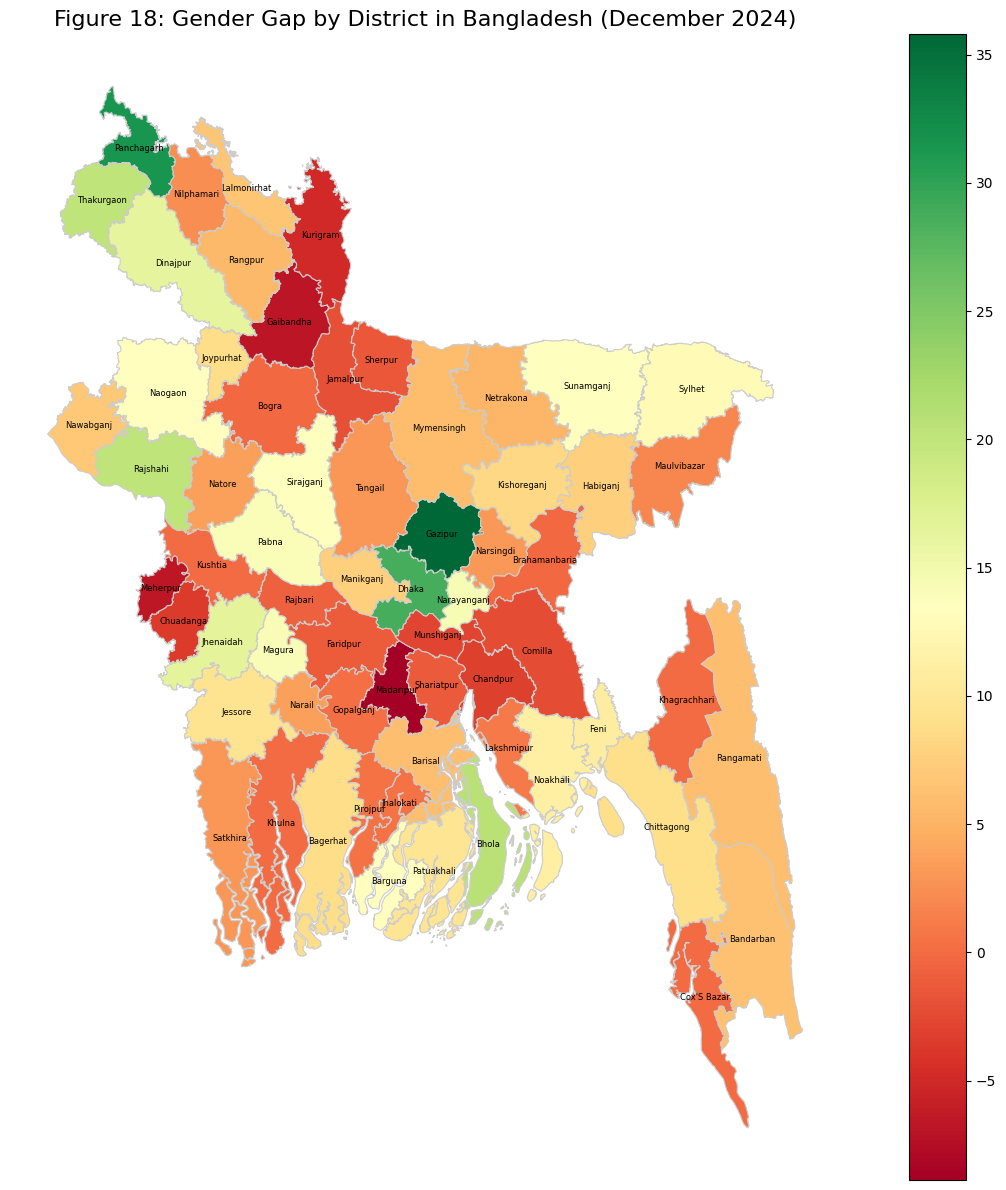

In [78]:
# Load gender gap data
aggregated_data = pd.read_csv("district_agent_account_gender_gap_updated.csv")

# Load district boundary shapefile/GeoPackage
file_path = "gadm41_BGD.gpkg"
layer_name = "ADM_ADM_2"  # District level
districts_gdf = gpd.read_file(file_path, layer=layer_name)

# Merge with gender gap data
merged_data = districts_gdf.merge(aggregated_data, left_on='NAME_2', right_on='District', how='left')
merged_data['Gender_Gap'] = merged_data['Gender_Gap'].fillna(0)

# Plot
fig, ax = plt.subplots(figsize=(14, 12))
merged_data.plot(column='Gender_Gap',
                 cmap='RdYlGn',
                 linewidth=0.8,
                 edgecolor='0.8',
                 legend=True,
                 ax=ax)

# Add district labels
for idx, row in merged_data.iterrows():
    if row['geometry'].centroid.is_empty:
        continue
    x, y = row['geometry'].centroid.x, row['geometry'].centroid.y
    ax.text(x, y, row['NAME_2'], fontsize=6, ha='center', va='center', color='black')

# Formatting
ax.set_title('Figure 18: Gender Gap by District in Bangladesh (December 2024)', fontsize=16)
ax.axis('off')
plt.tight_layout()

# Save path
output_dir = "C:/Users/ASUS/Ashish/Data/MFS/"
os.makedirs(output_dir, exist_ok=True)

# Save as both JPG and SVG
plt.savefig(os.path.join(output_dir, "figure_18_gender_gap_by_district_bangladesh.jpg"), dpi=300)

# Show plot
plt.show()


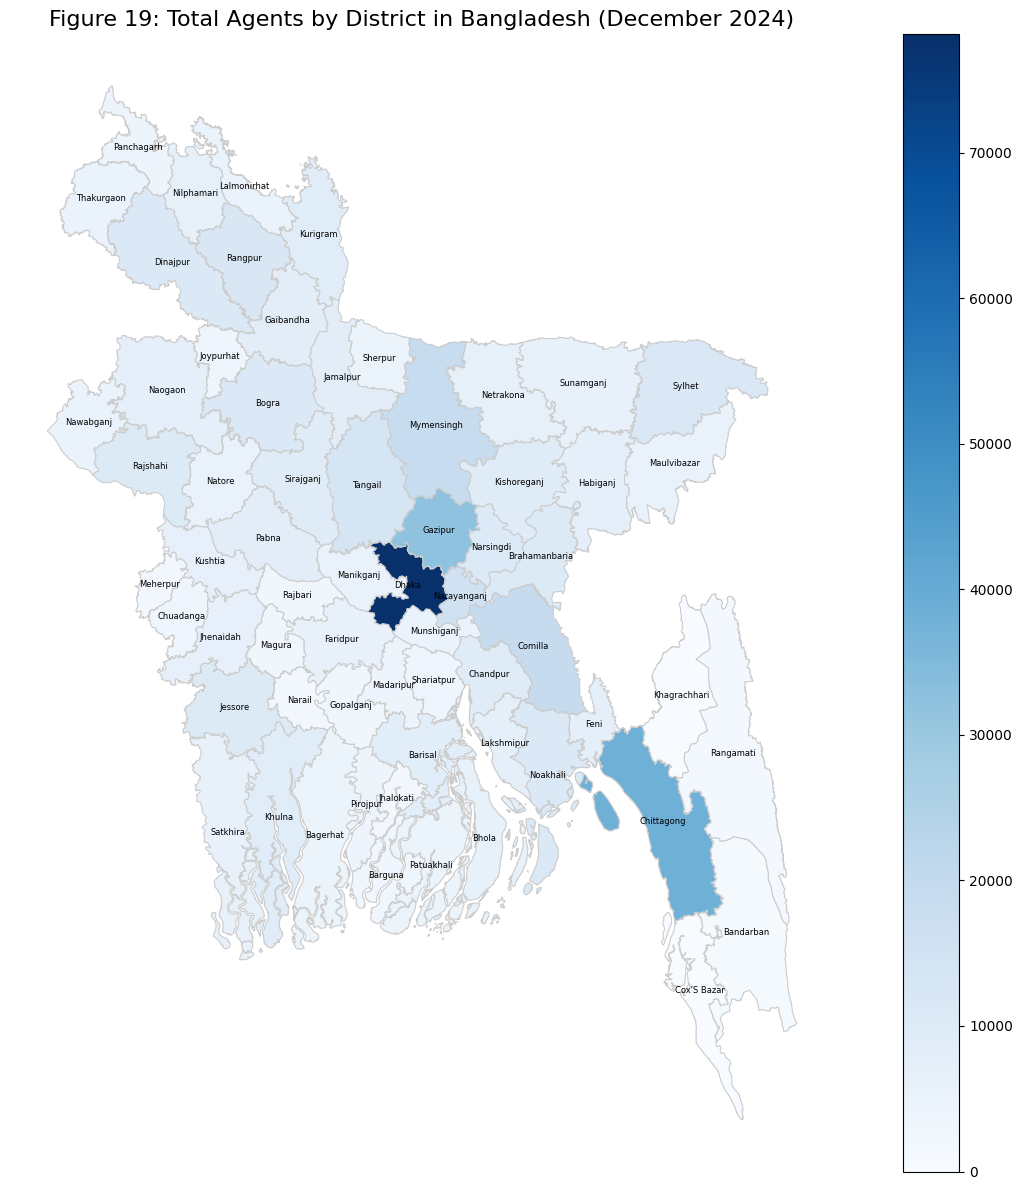

In [80]:
merged_data['Total_Agents'] = merged_data['Total_Agents'].fillna(0)

# Plot
fig, ax = plt.subplots(figsize=(14, 12))
merged_data.plot(column='Total_Agents',
                 cmap='Blues',
                 linewidth=0.8,
                 edgecolor='0.8',
                 legend=True,
                 ax=ax)

# Add district labels at centroid
for idx, row in merged_data.iterrows():
    if row['geometry'].centroid.is_empty:
        continue
    x, y = row['geometry'].centroid.x, row['geometry'].centroid.y
    ax.text(x, y, row['NAME_2'], fontsize=6, ha='center', va='center', color='black')

# Final touches
ax.set_title('Figure 19: Total Agents by District in Bangladesh (December 2024)', fontsize=16)
ax.axis('off')
plt.tight_layout()

# Save path
output_dir = "C:/Users/ASUS/Ashish/Data/MFS/"
os.makedirs(output_dir, exist_ok=True)

# Save as both JPG and SVG
plt.savefig(os.path.join(output_dir, "figure_19_total_agents_by_district_bangladesh.jpg"), dpi=300)

# Show the plot
plt.show()

# Section 9: Predictive Analysis

**Forcast Active Agents**

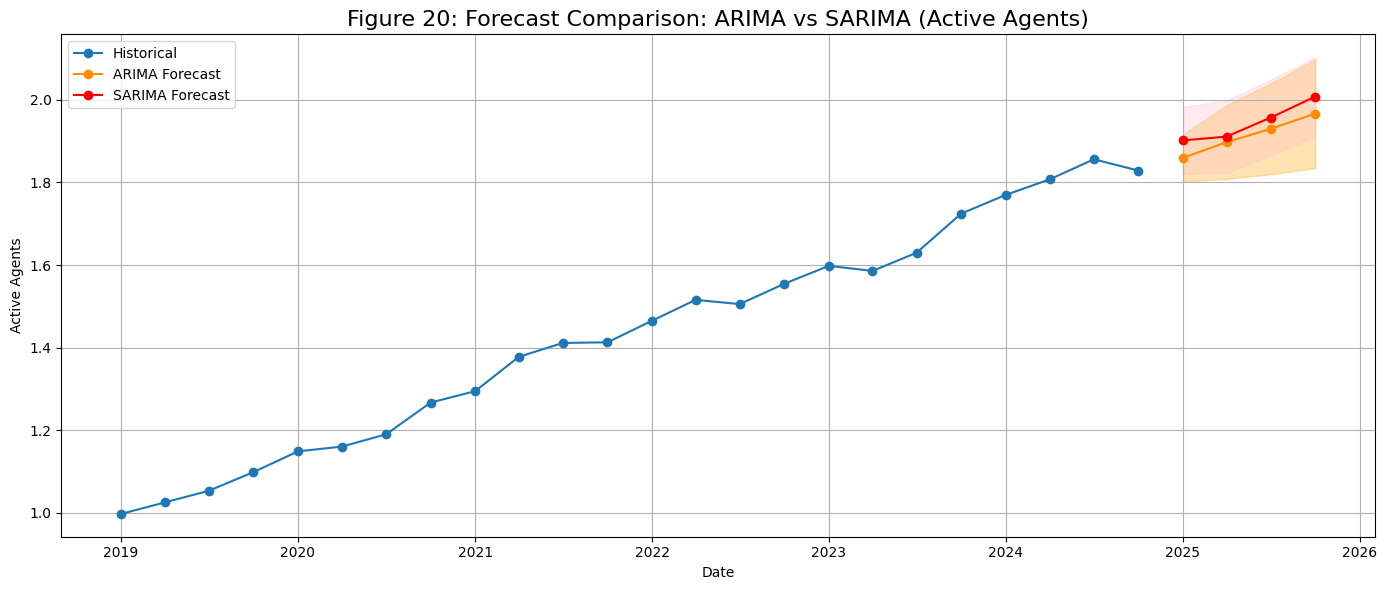

,Date,ARIMA Forecast,ARIMA Lower CI,ARIMA Upper CI,SARIMA Forecast,SARIMA Lower CI,SARIMA Upper CI
0,2025-01-01,1.859725,1.802925,1.916524,1.901979,1.820573,1.983385
1,2025-04-01,1.897732,1.808300,1.987164,1.911219,1.823448,1.998990
2,2025-07-01,1.930011,1.819965,2.040058,1.957288,1.865482,2.049094
3,2025-10-01,1.966849,1.834842,2.098856,2.008190,1.912718,2.103663


In [82]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load and prepare data
df = pd.read_csv("mobile_money.csv")

# Convert 'Q1-2019' format to datetime
def convert_quarter_to_date(q):
    quarter, year = q.split('-')
    month = {'Q1': '01', 'Q2': '04', 'Q3': '07', 'Q4': '10'}[quarter]
    return pd.to_datetime(f'{year}-{month}-01')

df['Date'] = df['Date'].apply(convert_quarter_to_date)
df.set_index('Date', inplace=True)
df.index = pd.DatetimeIndex(df.index, freq='QS')  # Explicit quarterly frequency

# CHOOSE VARIABLE HERE
target_variable = 'Active_Agents' 
ts = df[target_variable].dropna()

# Fit ARIMA model
arima_model = ARIMA(ts, order=(2, 1, 2))
arima_result = arima_model.fit(method_kwargs={"maxiter": 500})
arima_forecast = arima_result.get_forecast(steps=4)
arima_mean = arima_forecast.predicted_mean
arima_ci = arima_forecast.conf_int()

# Fit SARIMA model
sarima_model = SARIMAX(ts, order=(1, 1, 1), seasonal_order=(1, 1, 0, 4),
                       enforce_stationarity=False, enforce_invertibility=False)
sarima_result = sarima_model.fit()
sarima_forecast = sarima_result.get_forecast(steps=4)
sarima_mean = sarima_forecast.predicted_mean
sarima_ci = sarima_forecast.conf_int()

# Forecast index for Q1–Q4 2025
forecast_index = pd.date_range(start=ts.index[-1] + pd.offsets.QuarterBegin(), periods=4, freq='QS')

# Plot comparison
plt.figure(figsize=(14, 6))
plt.plot(ts, label='Historical', marker='o')

# ARIMA forecast and CI
plt.plot(forecast_index, arima_mean, label='ARIMA Forecast', color='darkorange', marker='o')
plt.fill_between(forecast_index, arima_ci.iloc[:, 0], arima_ci.iloc[:, 1], color='orange', alpha=0.3)

# SARIMA forecast and CI
plt.plot(forecast_index, sarima_mean, label='SARIMA Forecast', color='red', marker='o')
plt.fill_between(forecast_index, sarima_ci.iloc[:, 0], sarima_ci.iloc[:, 1], color='pink', alpha=0.3)

# Formatting
plt.title(f"Figure 20: Forecast Comparison: ARIMA vs SARIMA ({target_variable.replace('_', ' ')})", fontsize=16)
plt.xlabel("Date")
plt.ylabel(target_variable.replace('_', ' '))
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save output
plt.savefig(f"figure_20_forecast_comparison_{target_variable.lower()}.png", dpi=300)
plt.show()

# Display forecast table
forecast_df = pd.DataFrame({
    'Date': forecast_index,
    'ARIMA Forecast': arima_mean.values,
    'ARIMA Lower CI': arima_ci.iloc[:, 0].values,
    'ARIMA Upper CI': arima_ci.iloc[:, 1].values,
    'SARIMA Forecast': sarima_mean.values,
    'SARIMA Lower CI': sarima_ci.iloc[:, 0].values,
    'SARIMA Upper CI': sarima_ci.iloc[:, 1].values
})

# Optional export
forecast_df.to_csv(f"figure_20_forecast_table_{target_variable.lower()}.csv", index=False)

forecast_df


**Forecast vs. Actual Comparison (Active Agents)**

C:\Users\ASUS\anaconda3\envs\MyEnvironment\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\ASUS\anaconda3\envs\MyEnvironment\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



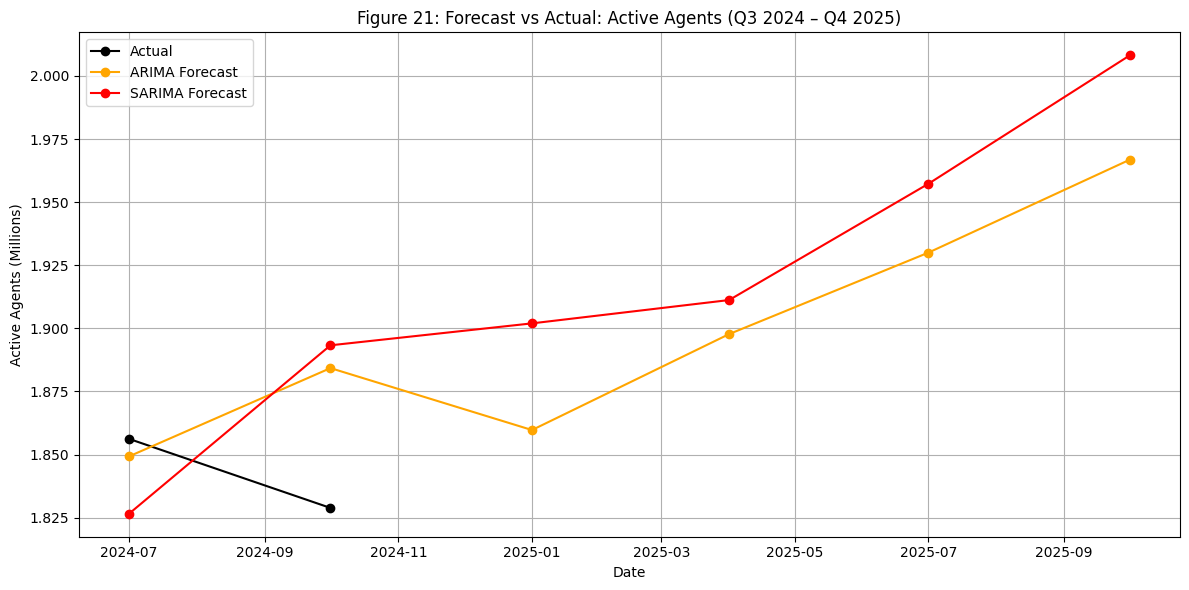

In [84]:
# Select variable
target_variable = 'Active_Agents'
ts_full = df[target_variable].dropna()

# Get actual values for Q3 and Q4 2024
actual_q3_2024 = ts_full.loc['2024-07-01']
actual_q4_2024 = ts_full.loc['2024-10-01']

# Train on data up to Q2 2024
ts_train_2024 = ts_full.loc[:'2024-04-01']

# Forecast Q3 & Q4 2024
arima_model_2024 = ARIMA(ts_train_2024, order=(2, 1, 2)).fit()
sarima_model_2024 = SARIMAX(ts_train_2024, order=(1, 1, 1), seasonal_order=(1, 1, 0, 4),
                            enforce_stationarity=False, enforce_invertibility=False).fit()
arima_pred_2024 = arima_model_2024.get_forecast(steps=2).predicted_mean
sarima_pred_2024 = sarima_model_2024.get_forecast(steps=2).predicted_mean

# Build Q3-Q4 2024 forecast comparison
index_2024 = pd.date_range(start='2024-07-01', periods=2, freq='QS')
df_2024 = pd.DataFrame({
    'Date': index_2024,
    'Actual': [actual_q3_2024, actual_q4_2024],
    'ARIMA Forecast': arima_pred_2024.values,
    'SARIMA Forecast': sarima_pred_2024.values
})
df_2024['ARIMA Error'] = df_2024['Actual'] - df_2024['ARIMA Forecast']
df_2024['SARIMA Error'] = df_2024['Actual'] - df_2024['SARIMA Forecast']

# Train on data up to Q4 2024 for 2025 forecast
ts_train_2025 = ts_full.loc[:'2024-10-01']
arima_model_2025 = ARIMA(ts_train_2025, order=(2, 1, 2)).fit()
sarima_model_2025 = SARIMAX(ts_train_2025, order=(1, 1, 1), seasonal_order=(1, 1, 0, 4),
                            enforce_stationarity=False, enforce_invertibility=False).fit()
arima_pred_2025 = arima_model_2025.get_forecast(steps=4).predicted_mean
sarima_pred_2025 = sarima_model_2025.get_forecast(steps=4).predicted_mean

# Combine with actuals (if available) for 2025
forecast_index_2025 = pd.date_range(start='2025-01-01', periods=4, freq='QS')
df_2025 = pd.DataFrame({
    'Date': forecast_index_2025,
    'Actual': ts_full.reindex(forecast_index_2025).values,
    'ARIMA Forecast': arima_pred_2025.values,
    'SARIMA Forecast': sarima_pred_2025.values
})
df_2025['ARIMA Error'] = df_2025['Actual'] - df_2025['ARIMA Forecast']
df_2025['SARIMA Error'] = df_2025['Actual'] - df_2025['SARIMA Forecast']

# Combine 2024 and 2025
combined_df = pd.concat([df_2024, df_2025], ignore_index=True)

# Plot forecast vs actual
plt.figure(figsize=(12, 6))
plt.plot(combined_df['Date'], combined_df['Actual'], label='Actual', marker='o', color='black')
plt.plot(combined_df['Date'], combined_df['ARIMA Forecast'], label='ARIMA Forecast', marker='o', color='orange')
plt.plot(combined_df['Date'], combined_df['SARIMA Forecast'], label='SARIMA Forecast', marker='o', color='red')
plt.title("Figure 21: Forecast vs Actual: Active Agents (Q3 2024 – Q4 2025)")
plt.xlabel("Date")
plt.ylabel("Active Agents (Millions)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("figure_21_active_agents_forecast_vs_actual_q3_2024_q4_2025.png", dpi=300)
plt.show()

# Export to CSV
combined_df.to_csv("figure_21_active_agents_forecast_vs_actual_q3_2024_q4_2025.csv", index=False)


**Forecast Registered Accounts**

C:\Users\ASUS\anaconda3\envs\MyEnvironment\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\ASUS\anaconda3\envs\MyEnvironment\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



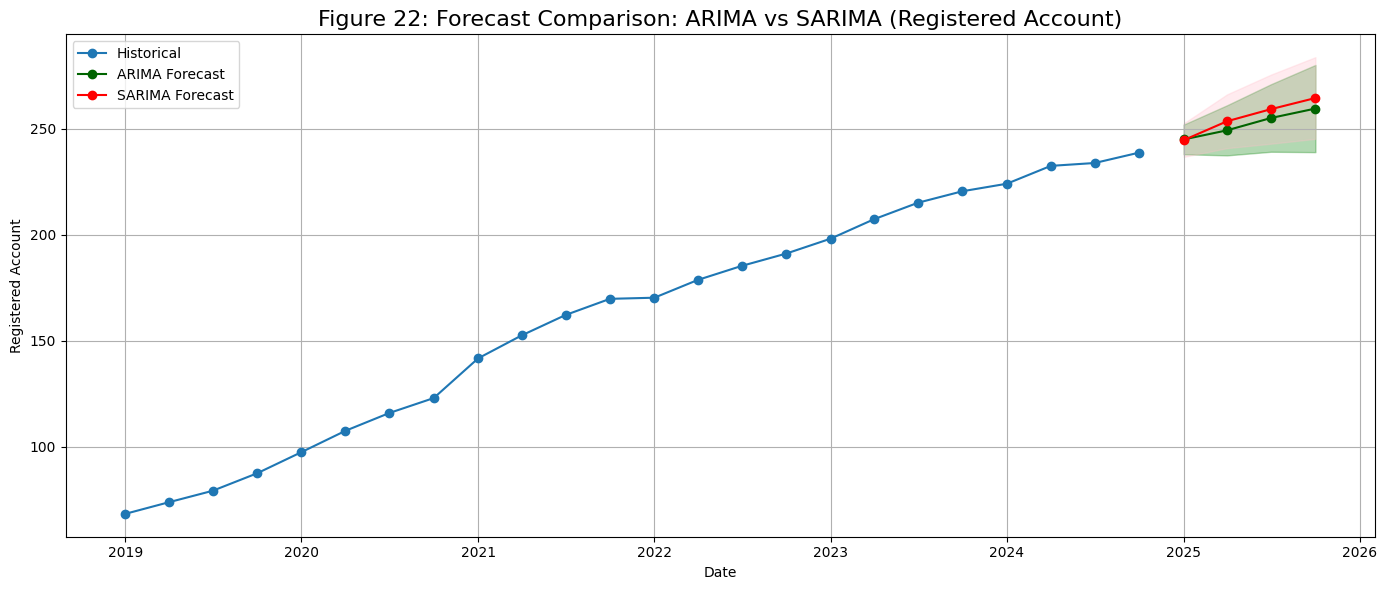

,Date,ARIMA Forecast,ARIMA Lower CI,ARIMA Upper CI,SARIMA Forecast,SARIMA Lower CI,SARIMA Upper CI
0,2025-01-01,244.879706,237.909091,251.850321,244.535711,236.647501,252.423922
1,2025-04-01,249.185180,237.368737,261.001623,253.460757,240.784793,266.136720
2,2025-07-01,254.999569,239.071137,270.928002,259.166153,242.876862,275.455444
3,2025-10-01,259.444354,238.886114,280.002594,264.416475,245.156218,283.676733


In [86]:
# CHOOSE VARIABLE HERE
target_variable = 'Registered_Account' 
ts = df[target_variable].dropna()

# Fit ARIMA model
arima_model = ARIMA(ts, order=(2, 1, 2))
arima_result = arima_model.fit(method_kwargs={"maxiter": 500})
arima_forecast = arima_result.get_forecast(steps=4)
arima_mean = arima_forecast.predicted_mean
arima_ci = arima_forecast.conf_int()

# Fit SARIMA model
sarima_model = SARIMAX(ts, order=(1, 1, 1), seasonal_order=(1, 1, 0, 4),
                       enforce_stationarity=False, enforce_invertibility=False)
sarima_result = sarima_model.fit()
sarima_forecast = sarima_result.get_forecast(steps=4)
sarima_mean = sarima_forecast.predicted_mean
sarima_ci = sarima_forecast.conf_int()

# Forecast index for Q1–Q4 2025
forecast_index = pd.date_range(start=ts.index[-1] + pd.offsets.QuarterBegin(), periods=4, freq='QS')

# Plot comparison
plt.figure(figsize=(14, 6))
plt.plot(ts, label='Historical', marker='o')

# ARIMA forecast and CI
plt.plot(forecast_index, arima_mean, label='ARIMA Forecast', color='darkgreen', marker='o')
plt.fill_between(forecast_index, arima_ci.iloc[:, 0], arima_ci.iloc[:, 1], color='green', alpha=0.3)

# SARIMA forecast and CI
plt.plot(forecast_index, sarima_mean, label='SARIMA Forecast', color='red', marker='o')
plt.fill_between(forecast_index, sarima_ci.iloc[:, 0], sarima_ci.iloc[:, 1], color='pink', alpha=0.3)

# Formatting
plt.title(f"Figure 22: Forecast Comparison: ARIMA vs SARIMA ({target_variable.replace('_', ' ')})", fontsize=16)
plt.xlabel("Date")
plt.ylabel(target_variable.replace('_', ' '))
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save output
plt.savefig(f"figure_22_forecast_comparison_{target_variable.lower()}.png", dpi=300)
plt.show()

# Display forecast table
forecast_df = pd.DataFrame({
    'Date': forecast_index,
    'ARIMA Forecast': arima_mean.values,
    'ARIMA Lower CI': arima_ci.iloc[:, 0].values,
    'ARIMA Upper CI': arima_ci.iloc[:, 1].values,
    'SARIMA Forecast': sarima_mean.values,
    'SARIMA Lower CI': sarima_ci.iloc[:, 0].values,
    'SARIMA Upper CI': sarima_ci.iloc[:, 1].values
})

# Optional export
forecast_df.to_csv(f"figure_22_forecast_table_{target_variable.lower()}.csv", index=False)

forecast_df

**Forecast vs. Actual Comparison (Registered Accounts)**

C:\Users\ASUS\anaconda3\envs\MyEnvironment\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\ASUS\anaconda3\envs\MyEnvironment\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\ASUS\anaconda3\envs\MyEnvironment\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\ASUS\anaconda3\envs\MyEnvironment\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



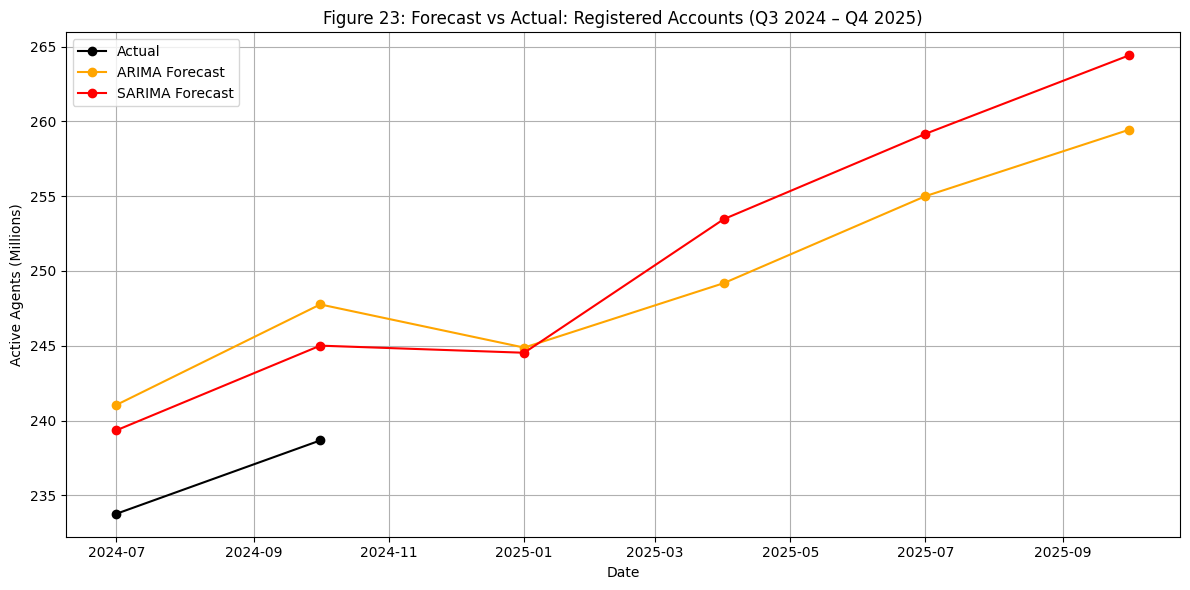

In [88]:
# Select variable
target_variable = 'Registered_Account'
ts_full = df[target_variable].dropna()

# Get actual values for Q3 and Q4 2024
actual_q3_2024 = ts_full.loc['2024-07-01']
actual_q4_2024 = ts_full.loc['2024-10-01']

# Train on data up to Q2 2024
ts_train_2024 = ts_full.loc[:'2024-04-01']

# Forecast Q3 & Q4 2024
arima_model_2024 = ARIMA(ts_train_2024, order=(2, 1, 2)).fit()
sarima_model_2024 = SARIMAX(ts_train_2024, order=(1, 1, 1), seasonal_order=(1, 1, 0, 4),
                            enforce_stationarity=False, enforce_invertibility=False).fit()
arima_pred_2024 = arima_model_2024.get_forecast(steps=2).predicted_mean
sarima_pred_2024 = sarima_model_2024.get_forecast(steps=2).predicted_mean

# Build Q3-Q4 2024 forecast comparison
index_2024 = pd.date_range(start='2024-07-01', periods=2, freq='QS')
df_2024 = pd.DataFrame({
    'Date': index_2024,
    'Actual': [actual_q3_2024, actual_q4_2024],
    'ARIMA Forecast': arima_pred_2024.values,
    'SARIMA Forecast': sarima_pred_2024.values
})
df_2024['ARIMA Error'] = df_2024['Actual'] - df_2024['ARIMA Forecast']
df_2024['SARIMA Error'] = df_2024['Actual'] - df_2024['SARIMA Forecast']

# Train on data up to Q4 2024 for 2025 forecast
ts_train_2025 = ts_full.loc[:'2024-10-01']
arima_model_2025 = ARIMA(ts_train_2025, order=(2, 1, 2)).fit()
sarima_model_2025 = SARIMAX(ts_train_2025, order=(1, 1, 1), seasonal_order=(1, 1, 0, 4),
                            enforce_stationarity=False, enforce_invertibility=False).fit()
arima_pred_2025 = arima_model_2025.get_forecast(steps=4).predicted_mean
sarima_pred_2025 = sarima_model_2025.get_forecast(steps=4).predicted_mean

# Combine with actuals (if available) for 2025
forecast_index_2025 = pd.date_range(start='2025-01-01', periods=4, freq='QS')
df_2025 = pd.DataFrame({
    'Date': forecast_index_2025,
    'Actual': ts_full.reindex(forecast_index_2025).values,
    'ARIMA Forecast': arima_pred_2025.values,
    'SARIMA Forecast': sarima_pred_2025.values
})
df_2025['ARIMA Error'] = df_2025['Actual'] - df_2025['ARIMA Forecast']
df_2025['SARIMA Error'] = df_2025['Actual'] - df_2025['SARIMA Forecast']

# Combine 2024 and 2025
combined_df = pd.concat([df_2024, df_2025], ignore_index=True)

# Plot forecast vs actual
plt.figure(figsize=(12, 6))
plt.plot(combined_df['Date'], combined_df['Actual'], label='Actual', marker='o', color='black')
plt.plot(combined_df['Date'], combined_df['ARIMA Forecast'], label='ARIMA Forecast', marker='o', color='orange')
plt.plot(combined_df['Date'], combined_df['SARIMA Forecast'], label='SARIMA Forecast', marker='o', color='red')
plt.title("Figure 23: Forecast vs Actual: Registered Accounts (Q3 2024 – Q4 2025)")
plt.xlabel("Date")
plt.ylabel("Active Agents (Millions)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("figure_23_registered_accounts_forecast_vs_actual_q3_2024_q4_2025.png", dpi=300)
plt.show()

# Export to CSV
combined_df.to_csv("figure_23_registered_accountsforecast_vs_actual_q3_2024_q4_2025.csv", index=False)


# Section 10: Additional Insights

**Correlation Matrix**

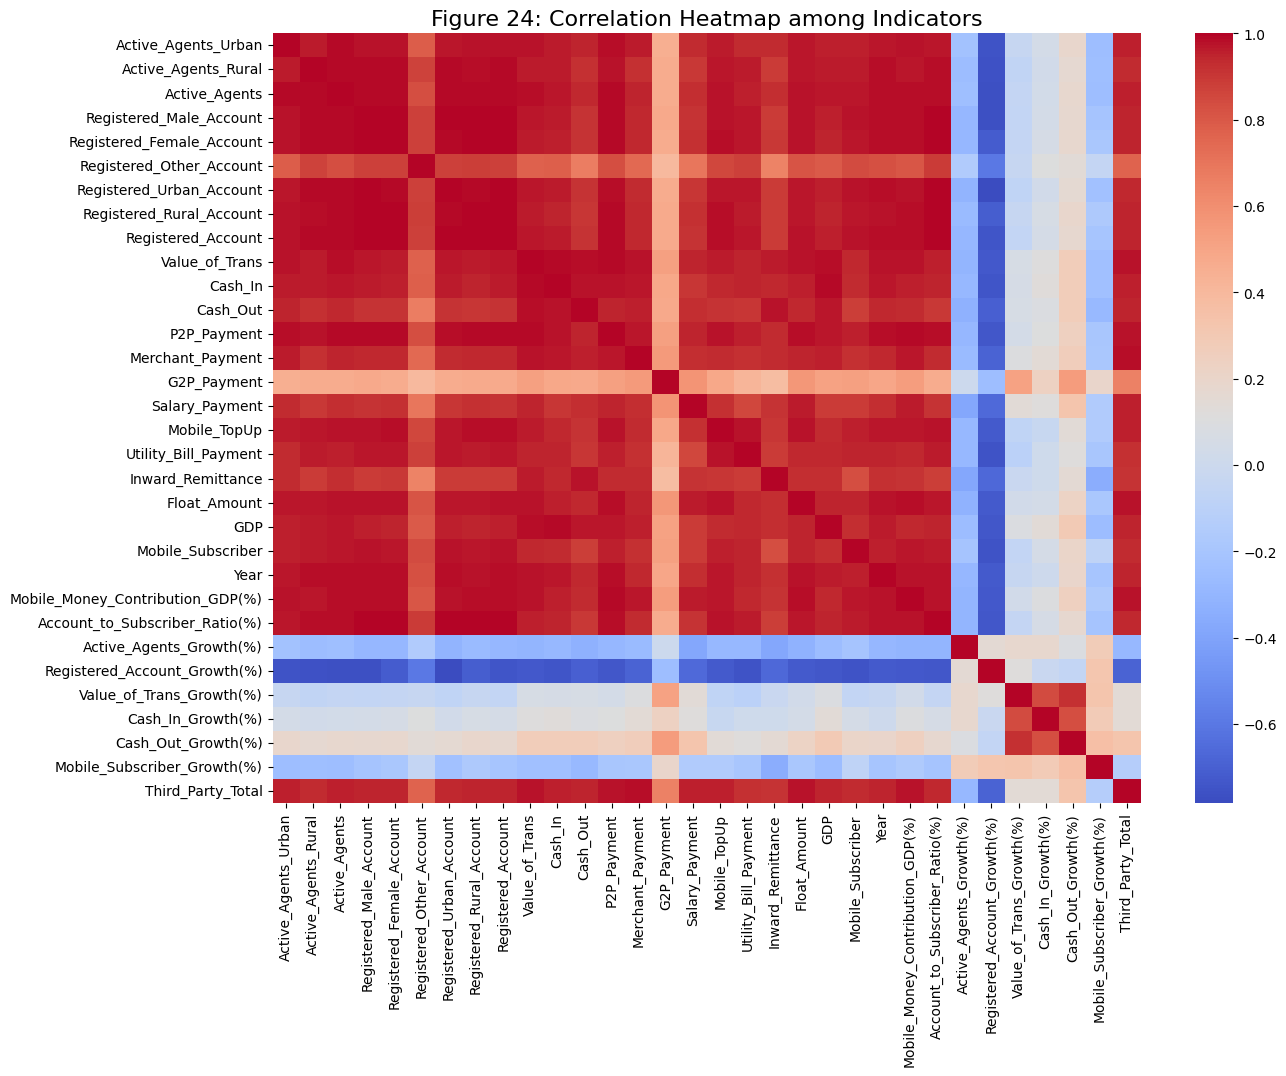

Correlation between Total Active Agents and Registered Accounts: 0.9916


In [98]:
# Only keep numeric columns
numeric_cols = mobile_money.select_dtypes(include=[np.number])
corr = numeric_cols.corr()

# Plot and save the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Figure 24: Correlation Heatmap among Indicators', fontsize=16)

# Save the figure
plt.savefig("figure_24_correlation_heatmap.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Compute Pearson correlation
correlation = mobile_money['Active_Agents'].corr(mobile_money['Registered_Account'])
print(f"Correlation between Total Active Agents and Registered Accounts: {correlation:.4f}")

**Paired T-Test for Forecast Accuracy**

In [104]:
from scipy.stats import ttest_rel

# Load the forecast vs actual data
active_agents_df = pd.read_csv("figure_21_active_agents_forecast_vs_actual_q3_2024_q4_2025.csv")
registered_accounts_df = pd.read_csv("figure_23_registered_accountsforecast_vs_actual_q3_2024_q4_2025.csv")

# Remove rows with NaNs (only compare quarters where actual data exists)
aa_clean = active_agents_df.dropna(subset=["Actual", "ARIMA Forecast", "SARIMA Forecast"])
ra_clean = registered_accounts_df.dropna(subset=["Actual", "ARIMA Forecast", "SARIMA Forecast"])

# Paired t-tests
# 1. Active Agents
t_aa_arima, p_aa_arima = ttest_rel(aa_clean["Actual"], aa_clean["ARIMA Forecast"])
t_aa_sarima, p_aa_sarima = ttest_rel(aa_clean["Actual"], aa_clean["SARIMA Forecast"])

# 2. Registered Accounts
t_ra_arima, p_ra_arima = ttest_rel(ra_clean["Actual"], ra_clean["ARIMA Forecast"])
t_ra_sarima, p_ra_sarima = ttest_rel(ra_clean["Actual"], ra_clean["SARIMA Forecast"])

# Summarize results
results = pd.DataFrame({
    "Model": ["ARIMA", "SARIMA", "ARIMA", "SARIMA"],
    "Target": ["Active_Agents", "Active_Agents", "Registered_Account", "Registered_Account"],
    "T-statistic": [t_aa_arima, t_aa_sarima, t_ra_arima, t_ra_sarima],
    "P-value": [p_aa_arima, p_aa_sarima, p_ra_arima, p_ra_sarima]
})

print(results)


    Model              Target  T-statistic   P-value
0   ARIMA       Active_Agents    -0.776791  0.579558
1  SARIMA       Active_Agents    -0.369064  0.774919
2   ARIMA  Registered_Account    -9.016809  0.070316
3  SARIMA  Registered_Account   -15.745764  0.040377


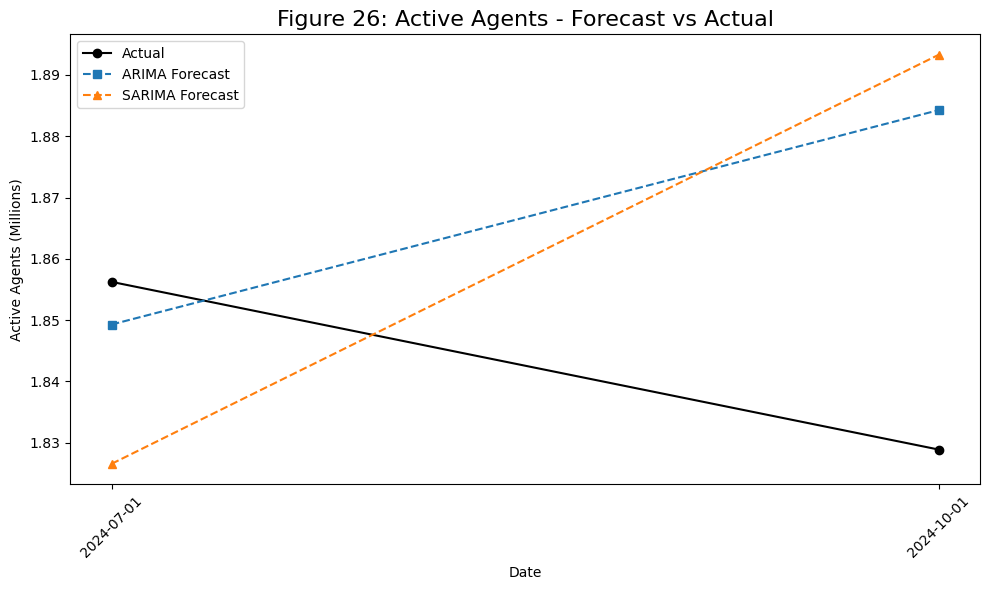

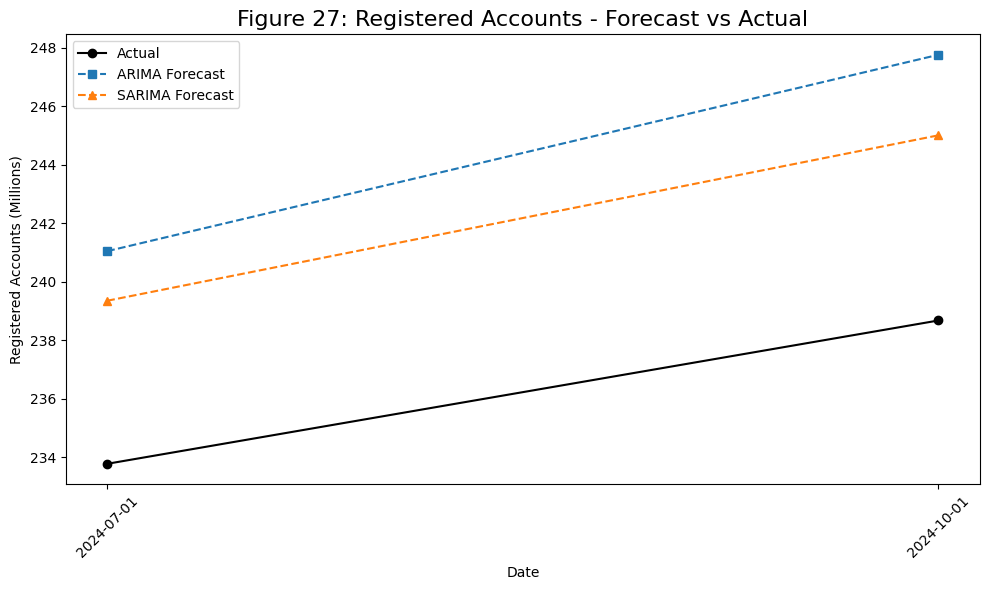

In [106]:
# Clean missing values
aa_clean = active_agents_df.dropna(subset=["Actual", "ARIMA Forecast", "SARIMA Forecast"])
ra_clean = registered_accounts_df.dropna(subset=["Actual", "ARIMA Forecast", "SARIMA Forecast"])

# Plot: Forecast vs Actual - Active Agents
plt.figure(figsize=(10, 6))
plt.plot(aa_clean['Date'], aa_clean['Actual'], marker='o', label='Actual', color='black')
plt.plot(aa_clean['Date'], aa_clean['ARIMA Forecast'], marker='s', label='ARIMA Forecast', linestyle='--')
plt.plot(aa_clean['Date'], aa_clean['SARIMA Forecast'], marker='^', label='SARIMA Forecast', linestyle='--')
plt.title('Figure 26: Active Agents - Forecast vs Actual', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Active Agents (Millions)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Save the figure
plt.savefig("figure_26_active_agents_forecast_vs_actual.png", dpi=300)
plt.show()

# Plot: Forecast vs Actual - Registered Accounts
plt.figure(figsize=(10, 6))
plt.plot(ra_clean['Date'], ra_clean['Actual'], marker='o', label='Actual', color='black')
plt.plot(ra_clean['Date'], ra_clean['ARIMA Forecast'], marker='s', label='ARIMA Forecast', linestyle='--')
plt.plot(ra_clean['Date'], ra_clean['SARIMA Forecast'], marker='^', label='SARIMA Forecast', linestyle='--')
plt.title('Figure 27: Registered Accounts - Forecast vs Actual', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Registered Accounts (Millions)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Save the figure
plt.savefig("figure_27_registered_accounts_forecast_vs_actual.png", dpi=300)
plt.show()

**Conclusion:**

Active Agents:

Both ARIMA and SARIMA models handle Active_Agents well; no statistically significant bias was found in the t-test. Either model is acceptable.

Registered Accounts:

For Registered_Account, SARIMA is more accurate and statistically better (as confirmed by t-test p-value < 0.05). It should be the preferred model here.